In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import os
from PIL import Image
if torch.cuda.is_available():
    print(torch.cuda.device_count())
device = torch.device("cuda:0")
print(device)

3
cuda:0


In [2]:
import glob
import re
import json
from pathlib import Path
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [3]:
history = 1
batchsize = 200
testsize = 10
epochs = 500
allsensors = (
    'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5',
    'sensor6','sensor8', 'sensor9', 'sensor10',
    'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
    'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21')
fpath = '/proj/NARO/sonoda/orchid/Orchid_16_selected'

In [4]:
alldata = {}
def sensdata(name):
    jso = open("../sonoda/{}/all.json".format(name))
    jsl = json.load(jso)
    alldata[name] = jsl
for sname in allsensors:
    sensdata(sname)

In [5]:
files = glob.glob(fpath+'/*.jpg')
sdata = []
fdata = []
tdata = []
counter = 0

for file in files:
    reres = re.findall('/proj/NARO/sonoda/orchid/Orchid_16_selected/data_(20\d\d)(\d\d)(\d\d)_(\d\d)(\d\d)(\d\d).jpg', file)
    (year, month, day, hour, minute, sec) = reres[0]
    dt_date = datetime(int(year), int(month), int(day), int(hour), int(minute), int(sec))
    dt_epoch = int(dt_date.timestamp()/60)*60
    dt_adj = datetime.fromtimestamp(dt_epoch)
    dt_prev = dt_adj
    time_adj = dt_adj.strftime('%Y-%m-%d-%H-%M')
    time_prev = time_adj
    
    dt_source = dt_adj + timedelta(minutes = history -1)
    time_source = dt_source.strftime('%Y-%m-%d-%H-%M')
    sensd = []
    histerr = 0
    for sname in allsensors:
        if alldata[sname].get(time_source):
            sensd.append(alldata[sname][time_source]['Temperature'])
        else:
            print('no_data')
            histerr = 1
            break
    if histerr:
        continue
    if not histerr:
        counter = counter + 1
        sdata.append(sensd)
        tdata.append(time_adj)
        fdata.append(file)
print(counter)

no_data
no_data
no_data
time_source 2022-01-12-19-35
sensor1の分データ {'Temperature': 35.14, 'Humidity': 36.734375, 'Pressure': 1006.0546272983902, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-19-35
sensor2の分データ {'Temperature': 17.82, 'Humidity': 68.09375, 'Pressure': 1006.5270466163118, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-12-19-35
sensor3の分データ {'Temperature': 29.58, 'Humidity': 48.984375, 'Pressure': 1006.2514686808576, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
no_data
no_data
time_source 2022-01-11-08-06
sensor1の分データ {'Temperature': 20.86, 'Humidity': 58.453125, 'Pressure': 1011.907377737087, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-08-06
sensor2の分データ {'Temperature': 19.84, 'Humidity': 72.515625, 'Pressure': 1012.6816205081254, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-08-06
sensor3の分データ {'Temperature': 19.98, 'Humidity': 68.921875, 'Pressure': 1012.3010605020219, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_so

time_source 2022-01-11-01-43
sensor10の分データ {'Temperature': 19.76, 'Humidity': 82.046875, 'Pressure': 1017.6945143816281, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-01-43
sensor11の分データ {'Temperature': 19.18, 'Humidity': 76.640625, 'Pressure': 1017.60265506981, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-01-43
sensor12の分データ {'Temperature': 18.8, 'Humidity': 79.4375, 'Pressure': 1016.8284122987717, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-01-43
sensor13の分データ {'Temperature': 18.14, 'Humidity': 84.546875, 'Pressure': 1016.9596398870832, 'UV': 0.07731958762886597, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-01-43
sensor14の分データ {'Temperature': 17.86, 'Humidity': 81.578125, 'Pressure': 1016.8809033340963, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-01-43
sensor15の分データ {'Temperature': 18.14, 'Humidity': 83.53125, 'Pressure': 1017.6551461051347, 'UV': 0.07731958762886597, 'AmbientLight': 21.551724137931032}
time_so

time_source 2022-01-15-18-00
sensor6の分データ {'Temperature': 19.38, 'Humidity': 63.296875, 'Pressure': 1019.7154192416266, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor8の分データ {'Temperature': 19.16, 'Humidity': 70.796875, 'Pressure': 1019.7810330357825, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-18-00
sensor9の分データ {'Temperature': 19.1, 'Humidity': 72.984375, 'Pressure': 1020.0697337300679, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor10の分データ {'Temperature': 18.9, 'Humidity': 72.9375, 'Pressure': 1019.9516289005875, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor11の分データ {'Temperature': 19.86, 'Humidity': 73.578125, 'Pressure': 1019.8466468299382, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-00
sensor12の分データ {'Temperature': 18.54, 'Humidity': 71.515625, 'Pressure': 1019.0461585412376, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-18-00
sensor13の分データ 

time_source 2022-01-13-19-55
sensor1の分データ {'Temperature': 35.38, 'Humidity': 35.8125, 'Pressure': 1000.7661554894331, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-19-55
sensor2の分データ {'Temperature': 17.5, 'Humidity': 71.15625, 'Pressure': 1001.2254520485237, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-19-55
sensor3の分データ {'Temperature': 28.94, 'Humidity': 50.171875, 'Pressure': 1000.9367513542381, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-19-55
sensor4の分データ {'Temperature': 17.66, 'Humidity': 73.125, 'Pressure': 1000.9498741130693, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-19-55
sensor5の分データ {'Temperature': 24.46, 'Humidity': 53.125, 'Pressure': 1000.7399099717708, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-19-55
sensor6の分データ {'Temperature': 17.7, 'Humidity': 66.28125, 'Pressure': 1001.2254520485237, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-13-19-55
sensor8の分

time_source 2022-01-11-08-48
sensor18の分データ {'Temperature': 20.24, 'Humidity': 73.796875, 'Pressure': 1010.5951018539712, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-08-48
sensor19の分データ {'Temperature': 20.24, 'Humidity': 75.75, 'Pressure': 1011.0150301365683, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-08-48
sensor20の分データ {'Temperature': 20.02, 'Humidity': 74.453125, 'Pressure': 1010.9231708247502, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-08-48
sensor21の分データ {'Temperature': 20.24, 'Humidity': 72.21875, 'Pressure': 1011.3562218661784, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-07-20-26
sensor1の分データ {'Temperature': 35.4, 'Humidity': 32.90625, 'Pressure': 1022.5761806668193, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-07-20-26
sensor2の分データ {'Temperature': 17.54, 'Humidity': 67.078125, 'Pressure': 1023.0223544670787, 'UV': 0, 'AmbientLig

time_source 2022-01-08-18-13
sensor14の分データ {'Temperature': 18.88, 'Humidity': 71.046875, 'Pressure': 1020.3978027008469, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-18-13
sensor15の分データ {'Temperature': 19.84, 'Humidity': 73.390625, 'Pressure': 1021.2114137483787, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-18-13
sensor16の分データ {'Temperature': 18.9, 'Humidity': 71.890625, 'Pressure': 1020.2928206301976, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-18-13
sensor17の分データ {'Temperature': 19.96, 'Humidity': 74.125, 'Pressure': 1021.0801861600671, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-18-13
sensor18の分データ {'Temperature': 18.16, 'Humidity': 71.296875, 'Pressure': 1020.2665751125353, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-18-13
sensor19の分データ {'Temperature': 18, 'Humidity': 73.6875, 'Pressure': 1020.8308537422752, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-18-13
sensor20の分データ {'

sensor16の分データ {'Temperature': 24.44, 'Humidity': 62.734375, 'Pressure': 1017.1171129930572, 'UV': 0.07731958762886597, 'AmbientLight': 86.20689655172413}
time_source 2022-01-15-11-54
sensor17の分データ {'Temperature': 26.42, 'Humidity': 57.671875, 'Pressure': 1018.2325474937056, 'UV': 0.6185567010309277, 'AmbientLight': 2112.0689655172414}
time_source 2022-01-15-11-54
sensor18の分データ {'Temperature': 24.48, 'Humidity': 60.671875, 'Pressure': 1017.3008316166934, 'UV': 0.07731958762886597, 'AmbientLight': 107.75862068965516}
time_source 2022-01-15-11-54
sensor19の分データ {'Temperature': 23.52, 'Humidity': 65.578125, 'Pressure': 1017.5895323109788, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-11-54
sensor20の分データ {'Temperature': 23.28, 'Humidity': 63.9375, 'Pressure': 1017.6420233463035, 'UV': 0.05154639175257732, 'AmbientLight': 129.3103448275862}
time_source 2022-01-15-11-54
sensor21の分データ {'Temperature': 23.32, 'Humidity': 61.796875, 'Pressure': 1018.04882887

sensor8の分データ {'Temperature': 18.16, 'Humidity': 65.609375, 'Pressure': 1023.2585641260396, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-02-59
sensor9の分データ {'Temperature': 18, 'Humidity': 60.03125, 'Pressure': 1023.4554055085069, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-02-59
sensor10の分データ {'Temperature': 17.74, 'Humidity': 67.34375, 'Pressure': 1023.3635461966888, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-02-59
sensor11の分データ {'Temperature': 17.34, 'Humidity': 62.6875, 'Pressure': 1023.2848096437018, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-02-59
sensor12の分データ {'Temperature': 17.62, 'Humidity': 64.765625, 'Pressure': 1022.5761806668193, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-02-59
sensor13の分データ {'Temperature': 16.86, 'Humidity': 68.46875, 'Pressure': 1022.7074082551309, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-02-59
sensor14の分データ {'Temperature':

sensor15の分データ {'Temperature': 17.44, 'Humidity': 70.953125, 'Pressure': 1020.5946440833143, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-16-04-48
sensor16の分データ {'Temperature': 16.26, 'Humidity': 71.453125, 'Pressure': 1019.7416647592889, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-16-04-48
sensor17の分データ {'Temperature': 17.48, 'Humidity': 71.578125, 'Pressure': 1020.4240482185091, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-16-04-48
sensor18の分データ {'Temperature': 16, 'Humidity': 70.765625, 'Pressure': 1019.7416647592889, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-16-04-48
sensor19の分データ {'Temperature': 15.48, 'Humidity': 73.234375, 'Pressure': 1020.2665751125353, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-16-04-48
sensor20の分データ {'Temperature': 15.58, 'Humidity': 71.28125, 'Pressure': 1020.0697337300679, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-16-04-48
sen

sensor21の分データ {'Temperature': 17.28, 'Humidity': 93.640625, 'Pressure': 997.459220263981, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-02-09-37
sensor1の分データ {'Temperature': 21.8, 'Humidity': 50.46875, 'Pressure': 1024.05905241474, 'UV': 0.28350515463917525, 'AmbientLight': 431.03448275862064}
time_source 2022-01-02-09-37
sensor2の分データ {'Temperature': 19.96, 'Humidity': 63.65625, 'Pressure': 1024.8201724269475, 'UV': 0.20618556701030927, 'AmbientLight': 625}
time_source 2022-01-02-09-37
sensor3の分データ {'Temperature': 21.4, 'Humidity': 56.40625, 'Pressure': 1024.4264896620125, 'UV': 0.25773195876288657, 'AmbientLight': 840.5172413793102}
time_source 2022-01-02-09-37
sensor4の分データ {'Temperature': 20.24, 'Humidity': 65, 'Pressure': 1024.5314717326619, 'UV': 0.23195876288659792, 'AmbientLight': 818.9655172413792}
time_source 2022-01-02-09-37
sensor5の分データ {'Temperature': 21.54, 'Humidity': 52.578125, 'Pressure': 1024.3083848325323, 'UV': 0.23195876288659792, 'AmbientLight': 625}
time_source 2

time_source 2022-01-07-22-07
sensor4の分データ {'Temperature': 15.92, 'Humidity': 70.9375, 'Pressure': 1023.1142137788968, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-22-07
sensor5の分データ {'Temperature': 17, 'Humidity': 53.546875, 'Pressure': 1022.8255130846113, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-22-07
sensor6の分データ {'Temperature': 16.08, 'Humidity': 64.5625, 'Pressure': 1023.5210193026627, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-22-07
sensor8の分データ {'Temperature': 17.88, 'Humidity': 71.1875, 'Pressure': 1023.5735103379874, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-07-22-07
sensor9の分データ {'Temperature': 20.96, 'Humidity': 65.84375, 'Pressure': 1023.8359655146105, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-07-22-07
sensor10の分データ {'Temperature': 17.52, 'Humidity': 72.9375, 'Pressure': 1023.7178606851301, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_so

sensor3の分データ {'Temperature': 21.58, 'Humidity': 67.90625, 'Pressure': 1003.6662851911193, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-12-31
sensor4の分データ {'Temperature': 21.52, 'Humidity': 72.65625, 'Pressure': 1003.7843900205996, 'UV': 0.07731958762886597, 'AmbientLight': 215.51724137931032}
time_source 2022-01-11-12-31
sensor5の分データ {'Temperature': 22.16, 'Humidity': 61.3125, 'Pressure': 1003.5350576028077, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-12-31
sensor6の分データ {'Temperature': 22, 'Humidity': 64.203125, 'Pressure': 1004.0993362325474, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-12-31
sensor8の分データ {'Temperature': 23.44, 'Humidity': 72.5, 'Pressure': 1004.309300373846, 'UV': 0.15463917525773194, 'AmbientLight': 366.37931034482756}
time_source 2022-01-11-12-31
sensor9の分データ {'Temperature': 27.02, 'Humidity': 58.3125, 'Pressure': 1004.4536507209888, 'UV': 0.07731958762886597, 'AmbientLight': 43

sensor6の分データ {'Temperature': 16.3, 'Humidity': 63.703125, 'Pressure': 1023.297932402533, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-07-23-05
sensor8の分データ {'Temperature': 17.5, 'Humidity': 65.90625, 'Pressure': 1023.1929503318837, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-07-23-05
sensor9の分データ {'Temperature': 16.56, 'Humidity': 64.96875, 'Pressure': 1023.5341420614939, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-07-23-05
sensor10の分データ {'Temperature': 17.12, 'Humidity': 67.90625, 'Pressure': 1023.3897917143511, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-23-05
sensor11の分データ {'Temperature': 16, 'Humidity': 69.953125, 'Pressure': 1023.3373006790265, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-07-23-05
sensor12の分データ {'Temperature': 16.74, 'Humidity': 66, 'Pressure': 1022.5761806668193, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-07-23-05
sensor13の分データ {'Temperature': 15.98, '

time_source 2022-01-08-21-40
sensor3の分データ {'Temperature': 23.94, 'Humidity': 48.21875, 'Pressure': 1019.9647516594187, 'UV': 0.10309278350515463, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-21-40
sensor4の分データ {'Temperature': 16.58, 'Humidity': 73.140625, 'Pressure': 1020.1091020065613, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-21-40
sensor5の分データ {'Temperature': 21.44, 'Humidity': 51.890625, 'Pressure': 1019.7941557946135, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-21-40
sensor6の分データ {'Temperature': 16.46, 'Humidity': 67.59375, 'Pressure': 1020.4634164950027, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-21-40
sensor8の分データ {'Temperature': 19.58, 'Humidity': 73.640625, 'Pressure': 1020.5159075303274, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-21-40
sensor9の分データ {'Temperature': 22.48, 'Humidity': 65.015625, 'Pressure': 1020.7652399481193, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-21-

time_source 2022-01-08-23-53
sensor1の分データ {'Temperature': 26.18, 'Humidity': 52.359375, 'Pressure': 1018.4031433585108, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-23-53
sensor2の分データ {'Temperature': 15.92, 'Humidity': 70.296875, 'Pressure': 1018.9674219882505, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-08-23-53
sensor3の分データ {'Temperature': 23.68, 'Humidity': 61.375, 'Pressure': 1018.7443350881208, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-53
sensor4の分データ {'Temperature': 16.02, 'Humidity': 72.34375, 'Pressure': 1018.7312123292897, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-53
sensor5の分データ {'Temperature': 19.32, 'Humidity': 59.8125, 'Pressure': 1018.5212481879912, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-08-23-53
sensor6の分データ {'Temperature': 16.32, 'Humidity': 64.640625, 'Pressure': 1019.0461585412376, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-23-53
s

time_source 2022-01-09-05-54
sensor19の分データ {'Temperature': 14.62, 'Humidity': 73.46875, 'Pressure': 1017.8126192111085, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-05-54
sensor20の分データ {'Temperature': 14.92, 'Humidity': 71.328125, 'Pressure': 1017.4583047226673, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-05-54
sensor21の分データ {'Temperature': 15.3, 'Humidity': 68.71875, 'Pressure': 1018.0750743877318, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-12-15-47
sensor1の分データ {'Temperature': 21.04, 'Humidity': 51.953125, 'Pressure': 1002.3933775844969, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-12-15-47
sensor2の分データ {'Temperature': 20.62, 'Humidity': 61.5, 'Pressure': 1003.141374837873, 'UV': 0.02577319587628866, 'AmbientLight': 215.51724137931032}
time_source 2022-01-12-15-47
sensor3の分データ {'Temperature': 21.38, 'Humidity': 58.828125, 'Pressure': 1002.734

sensor17の分データ {'Temperature': 24.38, 'Humidity': 70.5625, 'Pressure': 997.3279926756695, 'UV': 0.3608247422680412, 'AmbientLight': 1250}
time_source 2022-01-13-14-52
sensor18の分データ {'Temperature': 23.94, 'Humidity': 71.765625, 'Pressure': 996.3962767986573, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-14-52
sensor19の分データ {'Temperature': 23.82, 'Humidity': 74.515625, 'Pressure': 996.6718547341115, 'UV': 0.07731958762886597, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-14-52
sensor20の分データ {'Temperature': 23.7, 'Humidity': 72.734375, 'Pressure': 996.7505912870985, 'UV': 0.10309278350515463, 'AmbientLight': 107.75862068965516}
time_source 2022-01-13-14-52
sensor21の分データ {'Temperature': 24.14, 'Humidity': 69, 'Pressure': 997.1049057755398, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-12-07-12
sensor1の分データ {'Temperature': 20.08, 'Humidity': 54.921875, 'Pressure': 1000.9892423895628, 'UV': 0, 'AmbientLight'

time_source 2022-01-14-03-05
sensor3の分データ {'Temperature': 16.1, 'Humidity': 61.015625, 'Pressure': 1004.9260700389106, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-03-05
sensor4の分データ {'Temperature': 15.16, 'Humidity': 73.140625, 'Pressure': 1005.0966659037156, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-03-05
sensor5の分データ {'Temperature': 16.18, 'Humidity': 58.171875, 'Pressure': 1004.8079652094301, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-03-05
sensor6の分データ {'Temperature': 15.94, 'Humidity': 64.796875, 'Pressure': 1005.464103150988, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-03-05
sensor8の分データ {'Temperature': 15.56, 'Humidity': 70.703125, 'Pressure': 1005.4116121156634, 'UV': 0.02577319587628866, 'AmbientLight': 86.20689655172413}
time_source 2022-01-14-03-05
sensor9の分データ {'Temperature': 15.82, 'Humidity': 71.359375, 'Pressure': 1005.7265583276112, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-03-05
sensor10の分データ {'Temperature': 15.5

time_source 2022-01-14-01-03
sensor6の分データ {'Temperature': 15.94, 'Humidity': 68.765625, 'Pressure': 1004.2961776150149, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-01-03
sensor8の分データ {'Temperature': 17.16, 'Humidity': 71.46875, 'Pressure': 1004.2568093385214, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-01-03
sensor9の分データ {'Temperature': 16.68, 'Humidity': 71.9375, 'Pressure': 1004.6242465857938, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-14-01-03
sensor10の分データ {'Temperature': 17.24, 'Humidity': 72.234375, 'Pressure': 1004.4536507209888, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-01-03
sensor11の分データ {'Temperature': 16.54, 'Humidity': 74.234375, 'Pressure': 1004.4798962386511, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-14-01-03
sensor12の分データ {'Temperature': 17.22, 'Humidity': 69.6875, 'Pressure': 1003.6662851911193, 'UV': 0.07731958762886597, 'AmbientLight': 21.551724137931032}
time_source

time_source 2022-01-13-23-32
sensor19の分データ {'Temperature': 16.12, 'Humidity': 77.4375, 'Pressure': 1003.5088120851453, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-13-23-32
sensor20の分データ {'Temperature': 16.08, 'Humidity': 75.5625, 'Pressure': 1003.3382162203403, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-13-23-32
sensor21の分データ {'Temperature': 16.5, 'Humidity': 73.046875, 'Pressure': 1003.8631265735867, 'UV': 0.02577319587628866, 'AmbientLight': 0}
no_data
no_data
no_data
time_source 2022-01-13-01-25
sensor1の分データ {'Temperature': 18.86, 'Humidity': 41.859375, 'Pressure': 1005.8052948805981, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-01-25
sensor2の分データ {'Temperature': 15.36, 'Humidity': 71.4375, 'Pressure': 1006.5270466163118, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-01-25
sensor3の分データ {'Temperature': 18.2, 'Humidity': 52.609375, 'Pressure': 1006.1333638513771, 'UV': 0, 'AmbientLight': 43.103448

time_source 2022-01-14-16-10
sensor3の分データ {'Temperature': 19.58, 'Humidity': 56.359375, 'Pressure': 1008.023041123064, 'UV': 0.02577319587628866, 'AmbientLight': 86.20689655172413}
time_source 2022-01-14-16-10
sensor4の分データ {'Temperature': 19.7, 'Humidity': 60.171875, 'Pressure': 1008.0886549172199, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-14-16-10
sensor5の分データ {'Temperature': 20.06, 'Humidity': 50.703125, 'Pressure': 1007.773708705272, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-16-10
sensor6の分データ {'Temperature': 19.96, 'Humidity': 54.921875, 'Pressure': 1008.2986190585184, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
no_data
no_data
time_source 2022-01-13-07-15
sensor1の分データ {'Temperature': 20.48, 'Humidity': 53.171875, 'Pressure': 1003.5481803616389, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-07-15
sensor2の分データ {'Temperature': 17.36, 'Humidity': 69.328125, 'Pressure': 1004.2699320973526, 'UV': 0.0

time_source 2022-01-11-22-20
sensor8の分データ {'Temperature': 18.02, 'Humidity': 85.6875, 'Pressure': 997.0786602578775, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-22-20
sensor9の分データ {'Temperature': 20.32, 'Humidity': 81.296875, 'Pressure': 997.3936064698253, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-22-20
sensor10の分データ {'Temperature': 17.72, 'Humidity': 87.125, 'Pressure': 997.2361333638514, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-22-20
sensor11の分データ {'Temperature': 20.82, 'Humidity': 81.0625, 'Pressure': 997.2492561226825, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-22-20
sensor12の分データ {'Temperature': 17.46, 'Humidity': 86.203125, 'Pressure': 996.3569085221637, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-11-22-20
sensor13の分データ {'Temperature': 15.52, 'Humidity': 87.3125, 'Pressure': 996.461890592813, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-11-22-20
sensor14の分データ {'Temperature': 17.16, 'Humi

sensor5の分データ {'Temperature': 17.6, 'Humidity': 67.234375, 'Pressure': 1016.2903791866942, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-02-58
sensor6の分データ {'Temperature': 17.76, 'Humidity': 72.34375, 'Pressure': 1016.9071488517586, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-02-58
sensor8の分データ {'Temperature': 17.68, 'Humidity': 79.109375, 'Pressure': 1016.946517128252, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-02-58
sensor9の分データ {'Temperature': 16.66, 'Humidity': 82.265625, 'Pressure': 1017.274586099031, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-02-58
sensor10の分データ {'Temperature': 17.28, 'Humidity': 80.921875, 'Pressure': 1017.0777447165636, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-11-02-58
sensor11の分データ {'Temperature': 16.7, 'Humidity': 84.84375, 'Pressure': 1017.0252536812391, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-02-58
sensor12の分データ {'Temperature': 16.94, 'Humidity': 80.328125, 'Pressure': 1016.3166

sensor11の分データ {'Temperature': 16.72, 'Humidity': 87.5625, 'Pressure': 994.8609140154116, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-29
sensor12の分データ {'Temperature': 17.12, 'Humidity': 80.46875, 'Pressure': 994.0079346913863, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-19-29
sensor13の分データ {'Temperature': 16.74, 'Humidity': 80.703125, 'Pressure': 994.1129167620355, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2021-12-17-19-29
sensor14の分データ {'Temperature': 18.04, 'Humidity': 81.0625, 'Pressure': 994.1654077973602, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-29
sensor15の分データ {'Temperature': 16.66, 'Humidity': 82.390625, 'Pressure': 994.7559319447623, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-19-29
sensor16の分データ {'Temperature': 18.04, 'Humidity': 83.203125, 'Pressure': 994.0079346913863, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-19-29
sensor17の分データ {'Temperature': 16.74, 'Humidity'

no_data
time_source 2022-01-09-04-50
sensor1の分データ {'Temperature': 16.58, 'Humidity': 53.359375, 'Pressure': 1016.3428702220187, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-50
sensor2の分データ {'Temperature': 15.42, 'Humidity': 68.765625, 'Pressure': 1017.1958495460441, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-09-04-50
sensor3の分データ {'Temperature': 16.52, 'Humidity': 61.125, 'Pressure': 1016.7365529869535, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-50
sensor4の分データ {'Temperature': 15.5, 'Humidity': 70.78125, 'Pressure': 1016.9202716105898, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-50
sensor5の分データ {'Temperature': 16.42, 'Humidity': 57.234375, 'Pressure': 1016.5528343633173, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-09-04-50
sensor6の分データ {'Temperature': 16, 'Humidity': 62.859375, 'Pressure': 1017.2220950637064, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-09-04-50
sensor8の分データ {'Temperature': 18.82, 'Humidity': 

time_source 2022-01-14-08-44
sensor5の分データ {'Temperature': 22.26, 'Humidity': 52.15625, 'Pressure': 1008.4692149233234, 'UV': 0.05154639175257732, 'AmbientLight': 215.51724137931032}
time_source 2022-01-14-08-44
sensor6の分データ {'Temperature': 21.8, 'Humidity': 57.125, 'Pressure': 1008.9416342412451, 'UV': 0.15463917525773194, 'AmbientLight': 517.2413793103448}
no_data
time_source 2022-01-16-02-51
sensor1の分データ {'Temperature': 16.38, 'Humidity': 51.75, 'Pressure': 1019.6235599298085, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-16-02-51
sensor2の分データ {'Temperature': 15.36, 'Humidity': 70.4375, 'Pressure': 1020.3978027008469, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-16-02-51
sensor3の分データ {'Temperature': 16.34, 'Humidity': 60.25, 'Pressure': 1020.0041199359121, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-16-02-51
sensor4の分データ {'Temperature': 15.56, 'Humidity': 72.40625, 'Pressure': 1020.1747158007172, 'UV': 0, 'AmbientLight': 2

time_source 2022-01-14-01-13
sensor18の分データ {'Temperature': 16.22, 'Humidity': 73.71875, 'Pressure': 1003.8237582970931, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-01-13
sensor19の分データ {'Temperature': 15.8, 'Humidity': 76.578125, 'Pressure': 1004.3486686503395, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-14-01-13
sensor20の分データ {'Temperature': 15.94, 'Humidity': 74.4375, 'Pressure': 1004.1649500267033, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-14-01-13
sensor21の分データ {'Temperature': 16.4, 'Humidity': 71.578125, 'Pressure': 1004.7029831387808, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-16-10-33
sensor1の分データ {'Temperature': 37.96, 'Humidity': 35.859375, 'Pressure': 1018.8099488822767, 'UV': 0.23195876288659792, 'AmbientLight': 495.6896551724138}
time_source 2022-01-16-10-33
sensor2の分データ {'Temperature': 29.98, 'Humidity': 58.171875, 'Pressure': 1019.4004730296788, 'UV': 0.23195876288659792, 'AmbientLi

sensor8の分データ {'Temperature': 20.84, 'Humidity': 71.390625, 'Pressure': 1018.757457846952, 'UV': 0, 'AmbientLight': 129.3103448275862}
time_source 2022-01-15-16-41
sensor9の分データ {'Temperature': 20.08, 'Humidity': 71.96875, 'Pressure': 1019.0330357824064, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-16-41
sensor10の分データ {'Temperature': 20.68, 'Humidity': 72.828125, 'Pressure': 1018.9411764705883, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-16-41
sensor11の分データ {'Temperature': 19.46, 'Humidity': 75.59375, 'Pressure': 1018.7705806057832, 'UV': 0.05154639175257732, 'AmbientLight': 107.75862068965516}
time_source 2022-01-15-16-41
sensor12の分データ {'Temperature': 20.26, 'Humidity': 71.5, 'Pressure': 1017.9963378347447, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-15-16-41
sensor13の分データ {'Temperature': 19.44, 'Humidity': 73.6875, 'Pressure': 1018.2063019760434, 'UV': 0.05154639175257732, 'AmbientLigh

sensor1の分データ {'Temperature': 21.12, 'Humidity': 49.078125, 'Pressure': 1020.0828564888991, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-16-07-43
sensor2の分データ {'Temperature': 17.64, 'Humidity': 66.8125, 'Pressure': 1020.8308537422752, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-16-07-43
sensor3の分データ {'Temperature': 20.6, 'Humidity': 56.125, 'Pressure': 1020.5290302891584, 'UV': 0.02577319587628866, 'AmbientLight': 86.20689655172413}
time_source 2022-01-16-07-43
sensor4の分データ {'Temperature': 17.94, 'Humidity': 68.21875, 'Pressure': 1020.5552758068208, 'UV': 0, 'AmbientLight': 150.86206896551724}
time_source 2022-01-16-07-43
sensor5の分データ {'Temperature': 20.54, 'Humidity': 52.484375, 'Pressure': 1020.3190661478599, 'UV': 0.10309278350515463, 'AmbientLight': 0}
time_source 2022-01-16-07-43
sensor6の分データ {'Temperature': 18.34, 'Humidity': 59.75, 'Pressure': 1020.8308537422752, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022

sensor5の分データ {'Temperature': 21.36, 'Humidity': 61.53125, 'Pressure': 1011.9729915312429, 'UV': 0.05154639175257732, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-08-11
sensor6の分データ {'Temperature': 20.42, 'Humidity': 65.828125, 'Pressure': 1012.5241474021515, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-11-08-11
sensor8の分データ {'Temperature': 23.1, 'Humidity': 69.140625, 'Pressure': 1012.6160067139697, 'UV': 0.10309278350515463, 'AmbientLight': 215.51724137931032}
time_source 2022-01-11-08-11
sensor9の分データ {'Temperature': 22.86, 'Humidity': 63.84375, 'Pressure': 1012.9309529259175, 'UV': 0.05154639175257732, 'AmbientLight': 258.6206896551724}
time_source 2022-01-11-08-11
sensor10の分データ {'Temperature': 22.6, 'Humidity': 70.96875, 'Pressure': 1012.8522163729305, 'UV': 0.05154639175257732, 'AmbientLight': 215.51724137931032}
time_source 2022-01-11-08-11
sensor11の分データ {'Temperature': 23.38, 'Humidity': 62.0625, 'Pressure': 1012.6422522316319, 'UV': 0.0773195876

time_source 2022-01-08-09-16
sensor14の分データ {'Temperature': 19.46, 'Humidity': 68.140625, 'Pressure': 1023.5341420614939, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-09-16
sensor15の分データ {'Temperature': 22.24, 'Humidity': 63.34375, 'Pressure': 1024.3083848325323, 'UV': 0.38659793814432986, 'AmbientLight': 1767.2413793103447}
time_source 2022-01-08-09-16
sensor16の分データ {'Temperature': 19.6, 'Humidity': 68.34375, 'Pressure': 1023.3897917143511, 'UV': 0, 'AmbientLight': 86.20689655172413}
time_source 2022-01-08-09-16
sensor17の分データ {'Temperature': 22.54, 'Humidity': 63.390625, 'Pressure': 1024.1902800030518, 'UV': 0.902061855670103, 'AmbientLight': 4116.379310344827}
time_source 2022-01-08-09-16
sensor18の分データ {'Temperature': 20.4, 'Humidity': 66.46875, 'Pressure': 1023.4685282673381, 'UV': 0.07731958762886597, 'AmbientLight': 107.75862068965516}
time_source 2022-01-08-09-16
sensor19の分データ {'Temperature': 21.56, 'Humidity': 67.515625, 'Pressure': 1023.8

time_source 2022-01-07-20-05
sensor20の分データ {'Temperature': 17.6, 'Humidity': 70.015625, 'Pressure': 1022.5893034256504, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-20-05
sensor21の分データ {'Temperature': 18.12, 'Humidity': 67.15625, 'Pressure': 1023.1404592965591, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-08-21-08
sensor1の分データ {'Temperature': 34.46, 'Humidity': 33.265625, 'Pressure': 1019.9516289005875, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-21-08
sensor2の分データ {'Temperature': 17.3, 'Humidity': 69.59375, 'Pressure': 1020.3453116655222, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-21-08
sensor3の分データ {'Temperature': 28.4, 'Humidity': 47.078125, 'Pressure': 1020.1353475242237, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-21-08
sensor4の分データ {'Temperature': 17.3, 'Humidity': 72.15625, 'Pressure': 1020.1091020065613, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-21-08


time_source 2021-12-17-18-23
sensor15の分データ {'Temperature': 18.16, 'Humidity': 87.03125, 'Pressure': 994.480354009308, 'UV': 0, 'AmbientLight': 0}
time_source 2021-12-17-18-23
sensor16の分データ {'Temperature': 17.7, 'Humidity': 83.703125, 'Pressure': 993.6404974441139, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2021-12-17-18-23
sensor17の分データ {'Temperature': 18.38, 'Humidity': 88.78125, 'Pressure': 994.3622491798276, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-18-23
sensor18の分データ {'Temperature': 17.44, 'Humidity': 82.53125, 'Pressure': 993.6273746852827, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2021-12-17-18-23
sensor19の分データ {'Temperature': 17.32, 'Humidity': 84.703125, 'Pressure': 994.1391622796979, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2021-12-17-18-23
sensor20の分データ {'Temperature': 17.5, 'Humidity': 82.734375, 'Pressure': 993.9554436560617, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2

time_source 2022-01-13-20-11
sensor1の分データ {'Temperature': 35.12, 'Humidity': 34.890625, 'Pressure': 1000.9105058365759, 'UV': 0.02577319587628866, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-20-11
sensor2の分データ {'Temperature': 17.72, 'Humidity': 70.96875, 'Pressure': 1001.3960479133287, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-20-11
sensor3の分データ {'Temperature': 28.68, 'Humidity': 49.203125, 'Pressure': 1001.1598382543679, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-20-11
sensor4の分データ {'Temperature': 17.8, 'Humidity': 72.984375, 'Pressure': 1001.1073472190433, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-20-11
sensor5の分データ {'Temperature': 24.34, 'Humidity': 52.125, 'Pressure': 1000.9761196307317, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-20-11
sensor6の分データ {'Temperature': 17.66, 'Humidity': 66.625, 'Pressure': 1001.4485389486534, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-0

sensor1の分データ {'Temperature': 28.12, 'Humidity': 45.5625, 'Pressure': 1001.5141527428092, 'UV': 0.1804123711340206, 'AmbientLight': 193.9655172413793}
time_source 2022-01-12-11-42
sensor2の分データ {'Temperature': 32.58, 'Humidity': 51.796875, 'Pressure': 1002.4721141374838, 'UV': 0.48969072164948446, 'AmbientLight': 1120.6896551724137}
time_source 2022-01-12-11-42
sensor3の分データ {'Temperature': 26.42, 'Humidity': 56.875, 'Pressure': 1001.7503624017701, 'UV': 0.1804123711340206, 'AmbientLight': 560.3448275862069}
time_source 2022-01-12-11-42
sensor4の分データ {'Temperature': 29.84, 'Humidity': 56.65625, 'Pressure': 1001.9209582665751, 'UV': 0.6443298969072164, 'AmbientLight': 1896.551724137931}
time_source 2022-01-12-11-42
sensor5の分データ {'Temperature': 26.34, 'Humidity': 52.984375, 'Pressure': 1001.7241168841077, 'UV': 0.05154639175257732, 'AmbientLight': 215.51724137931032}
time_source 2022-01-12-11-42
sensor6の分データ {'Temperature': 27.4, 'Humidity': 52.90625, 'Pressure': 1002.0915541313802, 'UV': 0.

sensor2の分データ {'Temperature': 17.5, 'Humidity': 70.140625, 'Pressure': 1004.4142824444953, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-13-06-54
sensor3の分データ {'Temperature': 20.14, 'Humidity': 61.109375, 'Pressure': 1004.1649500267033, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-13-06-54
sensor4の分データ {'Temperature': 17.76, 'Humidity': 71.75, 'Pressure': 1004.2305638208591, 'UV': 0.02577319587628866, 'AmbientLight': 64.6551724137931}
time_source 2022-01-13-06-54
sensor5の分データ {'Temperature': 20.18, 'Humidity': 57.390625, 'Pressure': 1003.9812314030671, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-06-54
sensor6の分データ {'Temperature': 18.28, 'Humidity': 63.484375, 'Pressure': 1004.5717555504692, 'UV': 0, 'AmbientLight': 86.20689655172413}
time_source 2022-01-13-06-54
sensor8の分データ {'Temperature': 21.44, 'Humidity': 62.703125, 'Pressure': 1004.6242465857938, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-06-

time_source 2022-01-15-21-01
sensor15の分データ {'Temperature': 18.58, 'Humidity': 75.515625, 'Pressure': 1021.1720454718852, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-01
sensor16の分データ {'Temperature': 18.2, 'Humidity': 73.84375, 'Pressure': 1020.3715571831846, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-01
sensor17の分データ {'Temperature': 18.36, 'Humidity': 76.203125, 'Pressure': 1021.0276951247425, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-21-01
sensor18の分データ {'Temperature': 17.64, 'Humidity': 73.09375, 'Pressure': 1020.2928206301976, 'UV': 0.02577319587628866, 'AmbientLight': 43.103448275862064}
time_source 2022-01-15-21-01
sensor19の分データ {'Temperature': 17.54, 'Humidity': 75.640625, 'Pressure': 1020.7258716716259, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
no_data
time_source 2022-01-09-06-10
sensor1の分データ {'Temperature': 17.3, 'Humidity': 53.921875, 'Pressure': 1016.9990081635767, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 202

sensor3の分データ {'Temperature': 19.06, 'Humidity': 63.0625, 'Pressure': 1004.6111238269627, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-13-06-33
sensor4の分データ {'Temperature': 17.02, 'Humidity': 73.015625, 'Pressure': 1004.6767376211185, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-06-33
sensor5の分データ {'Temperature': 18.88, 'Humidity': 59.484375, 'Pressure': 1004.5061417563135, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-06-33
sensor6の分データ {'Temperature': 17.26, 'Humidity': 64.984375, 'Pressure': 1004.9916838330663, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-06-33
sensor8の分データ {'Temperature': 23.18, 'Humidity': 66.203125, 'Pressure': 1005.2541390096894, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-13-06-33
sensor9の分データ {'Temperature': 25.8, 'Humidity': 50.6875, 'Pressure': 1005.2541390096894, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-13-06-33
sensor10の分データ {'Temperature': 23.12, 'Humidity':

sensor14の分データ {'Temperature': 22.7, 'Humidity': 65.203125, 'Pressure': 1001.4091706721599, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-12-13-44
sensor15の分データ {'Temperature': 26.54, 'Humidity': 59.296875, 'Pressure': 1002.1965362020295, 'UV': 0.5412371134020618, 'AmbientLight': 2586.2068965517237}
time_source 2022-01-12-13-44
sensor16の分データ {'Temperature': 22.58, 'Humidity': 67.28125, 'Pressure': 1001.3698023956664, 'UV': 0.07731958762886597, 'AmbientLight': 86.20689655172413}
time_source 2022-01-12-13-44
sensor17の分データ {'Temperature': 26.7, 'Humidity': 59.03125, 'Pressure': 1002.1046768902113, 'UV': 0.8505154639175256, 'AmbientLight': 3060.3448275862065}
time_source 2022-01-12-13-44
sensor18の分データ {'Temperature': 22.68, 'Humidity': 65.3125, 'Pressure': 1001.2779430838483, 'UV': 0.02577319587628866, 'AmbientLight': 129.3103448275862}
time_source 2022-01-12-13-44
sensor19の分データ {'Temperature': 22.44, 'Humidity': 68.46875, 'Pressure': 1001.7634851606012,

time_source 2022-01-10-02-53
sensor9の分データ {'Temperature': 24.04, 'Humidity': 63.96875, 'Pressure': 1018.0357061112383, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-02-53
sensor10の分データ {'Temperature': 20.28, 'Humidity': 78.9375, 'Pressure': 1017.9176012817578, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-10-02-53
sensor11の分データ {'Temperature': 22.68, 'Humidity': 63.703125, 'Pressure': 1017.7994964522774, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-02-53
sensor12の分データ {'Temperature': 20.1, 'Humidity': 77.140625, 'Pressure': 1017.103990234226, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-10-02-53
sensor13の分データ {'Temperature': 18.48, 'Humidity': 80.390625, 'Pressure': 1017.2877088578622, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-10-02-53
sensor14の分データ {'Temperature': 17.3, 'Humidity': 77.109375, 'Pressure': 1017.1302357518883, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-10-02-53
sensor15の分データ

time_source 2022-01-08-23-16
sensor12の分データ {'Temperature': 16.9, 'Humidity': 73.03125, 'Pressure': 1019.0461585412376, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-16
sensor13の分データ {'Temperature': 15.1, 'Humidity': 75.390625, 'Pressure': 1019.0986495765621, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-08-23-16
sensor14の分データ {'Temperature': 15.66, 'Humidity': 71.84375, 'Pressure': 1019.0724040588998, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-16
sensor15の分データ {'Temperature': 15.16, 'Humidity': 74.90625, 'Pressure': 1019.7810330357825, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-23-16
sensor16の分データ {'Temperature': 15.82, 'Humidity': 72.40625, 'Pressure': 1019.0461585412376, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-23-16
sensor17の分データ {'Temperature': 15.3, 'Humidity': 76.015625, 'Pressure': 1019.5973144121461, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-23-16
sensor18の分データ {'Temperature': 14

time_source 2022-01-08-13-31
sensor11の分データ {'Temperature': 24.44, 'Humidity': 70.34375, 'Pressure': 1020.738994430457, 'UV': 0.48969072164948446, 'AmbientLight': 1874.9999999999998}
time_source 2022-01-08-13-31
sensor12の分データ {'Temperature': 24.92, 'Humidity': 66.375, 'Pressure': 1020.0041199359121, 'UV': 0.38659793814432986, 'AmbientLight': 1379.310344827586}
time_source 2022-01-08-13-31
sensor13の分データ {'Temperature': 25.66, 'Humidity': 62.96875, 'Pressure': 1020.2009613183795, 'UV': 1.1597938144329896, 'AmbientLight': 2392.2413793103447}
time_source 2022-01-08-13-31
sensor14の分データ {'Temperature': 24.2, 'Humidity': 66.828125, 'Pressure': 1019.9385061417563, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-08-13-31
sensor15の分データ {'Temperature': 25.58, 'Humidity': 63.859375, 'Pressure': 1020.6340123598077, 'UV': 0.3092783505154639, 'AmbientLight': 1443.9655172413793}
time_source 2022-01-08-13-31
sensor16の分データ {'Temperature': 24.12, 'Humidity': 68.28125, 'Pressure': 1019.68

time_source 2022-01-13-13-32
sensor14の分データ {'Temperature': 21.76, 'Humidity': 73.890625, 'Pressure': 997.5117112993057, 'UV': 0.05154639175257732, 'AmbientLight': 107.75862068965516}
time_source 2022-01-13-13-32
sensor15の分データ {'Temperature': 23.94, 'Humidity': 71.28125, 'Pressure': 998.272831311513, 'UV': 0.48969072164948446, 'AmbientLight': 1982.7586206896551}
time_source 2022-01-13-13-32
sensor16の分データ {'Temperature': 21.76, 'Humidity': 75.15625, 'Pressure': 997.3411154345007, 'UV': 0.05154639175257732, 'AmbientLight': 21.551724137931032}
time_source 2022-01-13-13-32
sensor17の分データ {'Temperature': 23.96, 'Humidity': 71.953125, 'Pressure': 998.2334630350194, 'UV': 0.5412371134020618, 'AmbientLight': 2004.310344827586}
time_source 2022-01-13-13-32
sensor18の分データ {'Temperature': 21.74, 'Humidity': 73.25, 'Pressure': 997.3936064698253, 'UV': 0.07731958762886597, 'AmbientLight': 107.75862068965516}
time_source 2022-01-13-13-32
sensor19の分データ {'Temperature': 21.42, 'Humidity': 76.203125, 'Pres

time_source 2022-01-07-19-23
sensor12の分データ {'Temperature': 22.24, 'Humidity': 64.125, 'Pressure': 1022.1824979018845, 'UV': 0.05154639175257732, 'AmbientLight': 64.6551724137931}
time_source 2022-01-07-19-23
sensor13の分データ {'Temperature': 20.06, 'Humidity': 69.25, 'Pressure': 1022.3530937666895, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-19-23
sensor14の分データ {'Temperature': 18.64, 'Humidity': 68.546875, 'Pressure': 1022.2349889372091, 'UV': 0.05154639175257732, 'AmbientLight': 0}
time_source 2022-01-07-19-23
sensor15の分データ {'Temperature': 20.3, 'Humidity': 68.984375, 'Pressure': 1022.9436179140918, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-07-19-23
sensor16の分データ {'Temperature': 18.98, 'Humidity': 68.796875, 'Pressure': 1022.0250247959106, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-07-19-23
sensor17の分データ {'Temperature': 20.24, 'Humidity': 69.890625, 'Pressure': 1022.8648813611047, 'UV': 0.05154639175257732, 'AmbientLigh

time_source 2022-01-11-04-07
sensor8の分データ {'Temperature': 17.4, 'Humidity': 78.6875, 'Pressure': 1015.3980315861753, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-11-04-07
sensor9の分データ {'Temperature': 16.42, 'Humidity': 83.125, 'Pressure': 1015.7523460746166, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-04-07
sensor10の分データ {'Temperature': 16.98, 'Humidity': 81.3125, 'Pressure': 1015.5948729686427, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-11-04-07
sensor11の分データ {'Temperature': 16.52, 'Humidity': 84.9375, 'Pressure': 1015.5555046921493, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-04-07
sensor12の分データ {'Temperature': 16.7, 'Humidity': 80.25, 'Pressure': 1014.7025253681239, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-11-04-07
sensor13の分データ {'Temperature': 16.28, 'Humidity': 81.609375, 'Pressure': 1014.8862439917601, 'UV': 0.02577319587628866, 'AmbientLight': 0}
time_source 2022-01-11-04-07
sensor14の分データ {'Temperature

sensor6の分データ {'Temperature': 16.2, 'Humidity': 62.546875, 'Pressure': 1017.103990234226, 'UV': 0.02577319587628866, 'AmbientLight': 0}
no_data
time_source 2022-01-14-13-52
sensor1の分データ {'Temperature': 26.34, 'Humidity': 44.375, 'Pressure': 1006.7370107576104, 'UV': 0.1804123711340206, 'AmbientLight': 301.7241379310345}
time_source 2022-01-14-13-52
sensor2の分データ {'Temperature': 26.24, 'Humidity': 53.390625, 'Pressure': 1007.5768673228046, 'UV': 0.25773195876288657, 'AmbientLight': 840.5172413793102}
time_source 2022-01-14-13-52
sensor3の分データ {'Temperature': 24.74, 'Humidity': 53.875, 'Pressure': 1007.1831845578698, 'UV': 0.1804123711340206, 'AmbientLight': 538.7931034482758}
time_source 2022-01-14-13-52
sensor4の分データ {'Temperature': 26.18, 'Humidity': 55.515625, 'Pressure': 1007.0913252460517, 'UV': 0.38659793814432986, 'AmbientLight': 1250}
time_source 2022-01-14-13-52
sensor5の分データ {'Temperature': 24.5, 'Humidity': 50.5, 'Pressure': 1006.9732204165713, 'UV': 0.12886597938144329, 'AmbientL

sensor10の分データ {'Temperature': 18.86, 'Humidity': 72.453125, 'Pressure': 1020.3978027008469, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-48
sensor11の分データ {'Temperature': 21.86, 'Humidity': 69.46875, 'Pressure': 1020.4502937361715, 'UV': 0, 'AmbientLight': 64.6551724137931}
time_source 2022-01-15-18-48
sensor12の分データ {'Temperature': 18.54, 'Humidity': 71.0625, 'Pressure': 1019.6104371709773, 'UV': 0, 'AmbientLight': 21.551724137931032}
time_source 2022-01-15-18-48
sensor13の分データ {'Temperature': 17.32, 'Humidity': 73.078125, 'Pressure': 1019.7416647592889, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-15-18-48
sensor14の分データ {'Temperature': 19.04, 'Humidity': 70.546875, 'Pressure': 1019.6235599298085, 'UV': 0, 'AmbientLight': 0}
no_data
time_source 2022-01-12-04-22
sensor1の分データ {'Temperature': 16.6, 'Humidity': 59.46875, 'Pressure': 999.7032120241092, 'UV': 0.07731958762886597, 'AmbientLight': 0}
time_source 2022-01-12-04-22
sensor2の分データ {'Temperature': 15.9, 'Humidity': 76.59375

sensor4の分データ {'Temperature': 15.52, 'Humidity': 71.5, 'Pressure': 1022.6942854962997, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-01-08
sensor5の分データ {'Temperature': 20.32, 'Humidity': 49.6875, 'Pressure': 1022.2874799725338, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-01-08
sensor6の分データ {'Temperature': 15.32, 'Humidity': 65.90625, 'Pressure': 1022.9961089494163, 'UV': 0.02577319587628866, 'AmbientLight': 21.551724137931032}
time_source 2022-01-08-01-08
sensor8の分データ {'Temperature': 17.08, 'Humidity': 69.296875, 'Pressure': 1022.9567406729228, 'UV': 0, 'AmbientLight': 0}
time_source 2022-01-08-01-08
sensor9の分データ {'Temperature': 20.14, 'Humidity': 66.46875, 'Pressure': 1023.2323186083772, 'UV': 0, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-01-08
sensor10の分データ {'Temperature': 17.02, 'Humidity': 70.578125, 'Pressure': 1023.1535820553903, 'UV': 0.07731958762886597, 'AmbientLight': 43.103448275862064}
time_source 2022-01-08-01-08
sensor11の分データ {'Temperature': 21.

In [6]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, transform=None):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
        self.data_num = len(tdata)
    def __len__(self):
        return self.data_num
    def __getitem__(self, idx):
        image = Image.open(fdata[idx])
#        if self.transform:
#            out_data = self.transform(image)
        out_data = np.array(image).reshape(16*18).astype(np.int32)
        out_data = out_data*50/255
        return torch.Tensor(sdata[idx]), torch.Tensor(out_data) 
data_set = MyDataset()

In [7]:
def heatmapshow(data):
    im = Image.fromarray(data[0].numpy().reshape([16,18]).copy()*255/50)
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    plt.show()

In [13]:
train_size = len(data_set)*0.8
train_size

960.0

In [15]:
from torch.utils.data.dataset import Subset
def split_dataset(data_set, split_at, order=None):#order = Noneは，呼び出し時に指定されなかったらデフォルトで　Noneを使ってねといういう意味
    from torch.utils.data.dataset import Subset
    n_examples = len(data_set)
    if split_at < 0:
        raise ValueError('split_at must be non-negative')
    if split_at > n_examples:
        raise ValueError('split_at exceeds the dataset size')
    if order is not None:
        subset1_indices = order[0:split_at]
        subset2_indices = order[split_at:n_examples]
    else:
        subset1_indices = list(range(0,split_at))
        subset2_indices = list(range(split_at,n_examples))

    subset1 = Subset(data_set, subset1_indices)
    subset2 = Subset(data_set, subset2_indices)
    return subset1, subset2

def split_dataset_random(data_set, first_size, seed=0):
    order = np.random.RandomState(seed).permutation(len(data_set))
    return split_dataset(data_set, int(first_size), order)

In [17]:
test_dataset, data_set = split_dataset_random(data_set, testsize, seed=0)#テストデータ作った
train_dataset, val_dataset = split_dataset_random(data_set, train_size, seed=0)

test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
train_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=True)
val_loader = DataLoader(dataset=data_set, batch_size=batchsize, shuffle=False)

10
1190


In [18]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()
        self.fc1 = nn.Linear(xsize, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 13*15)
        self.conv = nn.Sequential(
            torch.nn.ConvTranspose2d(1, 1, kernel_size=(4, 4),  stride=(1, 1)),#(2, 6), (4, 6)
            torch.nn.ReLU(),
        )
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = x.view(x.size(0), 1, 13, 15)
        x = self.conv(x)
        return x
model = NET().to(device)
model

NET(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=195, bias=True)
  (conv): Sequential(
    (0): ConvTranspose2d(1, 1, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
  )
)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
train_loss_list = []
val_loss_list = []
for epoch in range(epochs):
    
    model.train()
    train_running_loss = 0
    for batch_idx, (x, c) in enumerate(train_loader):
        x = x.to(device)
        c = c.to(device)
        optimizer.zero_grad()
        y = model(x)

        c = c.view(x.size(0), 1, 16, 18)
        train_loss = criterion(y, c)
        train_running_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()
    train_loss_list.append(train_loss)
    train_loss = train_running_loss / len(train_loader) 
    
    model.eval()
    val_running_loss = 0
    with torch.no_grad():
        for batch_idx, (x, c) in enumerate(val_loader):
            x = x.to(device)
            c = c.to(device)
            c = c.view(x.size(0), 1, 16, 18)
            y = model(x)
            val_loss = criterion(y, c)
            val_running_loss += val_loss.item()
        val_loss_list.append(val_loss)

    if epoch == 0:
        best_epoch = epoch
        torch.save(model.state_dict(), 'model.pth')
        best_valid_loss = val_running_loss
    else:
        if best_valid_loss > val_running_loss:
            torch.save(model.state_dict(), f"model{epoch}.pth")
            best_valid_loss = val_running_loss
            best_epoch = epoch

    val_loss = val_running_loss / len(val_loader)  
    print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, train_loss, val_loss))
    
print('best_epoch', best_epoch)

epoch 0, loss: 1017.6491 val_loss: 917.2958
epoch 1, loss: 795.3248 val_loss: 681.5897
epoch 2, loss: 674.9276 val_loss: 611.8396
epoch 3, loss: 603.0988 val_loss: 596.9153
epoch 4, loss: 583.3196 val_loss: 572.9719
epoch 5, loss: 568.1050 val_loss: 556.1244
epoch 6, loss: 553.1179 val_loss: 548.8032
epoch 7, loss: 544.3943 val_loss: 539.7801
epoch 8, loss: 536.2581 val_loss: 531.4383
epoch 9, loss: 526.4690 val_loss: 517.8552
epoch 10, loss: 510.8692 val_loss: 500.7772
epoch 11, loss: 495.5514 val_loss: 489.7653
epoch 12, loss: 486.0896 val_loss: 479.6949
epoch 13, loss: 475.2481 val_loss: 468.9008
epoch 14, loss: 465.5098 val_loss: 461.8685
epoch 15, loss: 458.7143 val_loss: 454.1763
epoch 16, loss: 451.1592 val_loss: 447.9373
epoch 17, loss: 445.8540 val_loss: 443.3223
epoch 18, loss: 441.9902 val_loss: 440.1517
epoch 19, loss: 438.3325 val_loss: 436.1914
epoch 20, loss: 434.6433 val_loss: 432.2427
epoch 21, loss: 430.0854 val_loss: 426.4737
epoch 22, loss: 423.8257 val_loss: 421.10

epoch 185, loss: 216.1640 val_loss: 216.9564
epoch 186, loss: 216.7134 val_loss: 216.1945
epoch 187, loss: 216.2230 val_loss: 216.1495
epoch 188, loss: 216.0572 val_loss: 215.9625
epoch 189, loss: 215.9440 val_loss: 215.9945
epoch 190, loss: 216.2980 val_loss: 216.3433
epoch 191, loss: 216.0843 val_loss: 215.8643
epoch 192, loss: 215.8639 val_loss: 215.8014
epoch 193, loss: 215.8747 val_loss: 216.6505
epoch 194, loss: 216.2368 val_loss: 215.7983
epoch 195, loss: 215.7279 val_loss: 215.7558
epoch 196, loss: 215.6487 val_loss: 215.7247
epoch 197, loss: 215.6474 val_loss: 216.5284
epoch 198, loss: 216.2050 val_loss: 215.9382
epoch 199, loss: 216.4449 val_loss: 217.9163
epoch 200, loss: 216.5228 val_loss: 216.0144
epoch 201, loss: 215.8973 val_loss: 215.9862
epoch 202, loss: 215.8958 val_loss: 215.4927
epoch 203, loss: 215.6303 val_loss: 215.8091
epoch 204, loss: 215.6955 val_loss: 215.4331
epoch 205, loss: 215.8158 val_loss: 215.9475
epoch 206, loss: 215.3573 val_loss: 215.0745
epoch 207,

epoch 368, loss: 186.1685 val_loss: 186.0564
epoch 369, loss: 186.2154 val_loss: 186.3291
epoch 370, loss: 186.6683 val_loss: 186.0437
epoch 371, loss: 187.3052 val_loss: 186.1680
epoch 372, loss: 186.2740 val_loss: 186.4497
epoch 373, loss: 186.0773 val_loss: 186.6126
epoch 374, loss: 186.0995 val_loss: 185.9246
epoch 375, loss: 185.9206 val_loss: 185.9901
epoch 376, loss: 186.0630 val_loss: 186.0218
epoch 377, loss: 185.9920 val_loss: 186.6959
epoch 378, loss: 186.6184 val_loss: 186.2621
epoch 379, loss: 186.2356 val_loss: 186.1562
epoch 380, loss: 186.1594 val_loss: 186.6678
epoch 381, loss: 186.2139 val_loss: 186.1412
epoch 382, loss: 186.0371 val_loss: 186.0211
epoch 383, loss: 185.9891 val_loss: 185.9508
epoch 384, loss: 185.8879 val_loss: 185.8537
epoch 385, loss: 185.8404 val_loss: 186.2112
epoch 386, loss: 185.9338 val_loss: 185.8065
epoch 387, loss: 185.7979 val_loss: 185.7581
epoch 388, loss: 185.8599 val_loss: 185.7680
epoch 389, loss: 185.8350 val_loss: 185.7642
epoch 390,

epoch 551, loss: 182.0153 val_loss: 182.2040
epoch 552, loss: 182.0217 val_loss: 181.9634
epoch 553, loss: 181.9560 val_loss: 182.1143
epoch 554, loss: 182.1209 val_loss: 181.9288
epoch 555, loss: 181.9360 val_loss: 182.5692
epoch 556, loss: 182.2715 val_loss: 182.0435
epoch 557, loss: 181.9593 val_loss: 181.9557
epoch 558, loss: 181.9255 val_loss: 181.9639
epoch 559, loss: 182.0865 val_loss: 182.1729
epoch 560, loss: 182.0894 val_loss: 181.9095
epoch 561, loss: 181.9230 val_loss: 181.9278
epoch 562, loss: 182.4601 val_loss: 181.8678
epoch 563, loss: 182.8212 val_loss: 181.8863
epoch 564, loss: 181.8936 val_loss: 181.8608
epoch 565, loss: 181.8676 val_loss: 181.8142
epoch 566, loss: 182.1278 val_loss: 181.8238
epoch 567, loss: 182.2403 val_loss: 181.8785
epoch 568, loss: 182.1016 val_loss: 181.9961
epoch 569, loss: 182.0934 val_loss: 181.8823
epoch 570, loss: 181.9603 val_loss: 181.7924
epoch 571, loss: 181.8594 val_loss: 182.1213
epoch 572, loss: 181.9513 val_loss: 181.8614
epoch 573,

epoch 734, loss: 181.1595 val_loss: 182.4496
epoch 735, loss: 181.4740 val_loss: 181.1616
epoch 736, loss: 180.8832 val_loss: 180.7847
epoch 737, loss: 180.7683 val_loss: 180.8017
epoch 738, loss: 180.7760 val_loss: 180.9268
epoch 739, loss: 180.7922 val_loss: 180.7536
epoch 740, loss: 180.7670 val_loss: 180.8085
epoch 741, loss: 180.7783 val_loss: 180.8154
epoch 742, loss: 180.7568 val_loss: 181.2881
epoch 743, loss: 181.5725 val_loss: 180.7768
epoch 744, loss: 181.1398 val_loss: 180.8147
epoch 745, loss: 180.9888 val_loss: 180.7884
epoch 746, loss: 181.0237 val_loss: 180.9290
epoch 747, loss: 181.0157 val_loss: 181.0724
epoch 748, loss: 180.8531 val_loss: 181.2882
epoch 749, loss: 180.7441 val_loss: 180.7101
epoch 750, loss: 180.7777 val_loss: 180.8702
epoch 751, loss: 180.8154 val_loss: 181.4109
epoch 752, loss: 181.0104 val_loss: 180.6974
epoch 753, loss: 180.7776 val_loss: 180.8135
epoch 754, loss: 180.9861 val_loss: 180.8303
epoch 755, loss: 180.8262 val_loss: 180.7447
epoch 756,

epoch 917, loss: 172.0027 val_loss: 170.5126
epoch 918, loss: 170.2826 val_loss: 170.1287
epoch 919, loss: 169.7555 val_loss: 169.4741
epoch 920, loss: 169.4241 val_loss: 169.1384
epoch 921, loss: 169.1036 val_loss: 169.4329
epoch 922, loss: 169.8574 val_loss: 169.6788
epoch 923, loss: 169.3912 val_loss: 169.1736
epoch 924, loss: 169.0474 val_loss: 169.0820
epoch 925, loss: 169.1627 val_loss: 168.8615
epoch 926, loss: 168.9824 val_loss: 169.2307
epoch 927, loss: 169.2862 val_loss: 168.9587
epoch 928, loss: 169.2292 val_loss: 168.9084
epoch 929, loss: 169.0043 val_loss: 169.1410
epoch 930, loss: 169.2750 val_loss: 170.2356
epoch 931, loss: 169.6530 val_loss: 168.7585
epoch 932, loss: 169.3206 val_loss: 168.7161
epoch 933, loss: 169.2174 val_loss: 170.2864
epoch 934, loss: 169.4652 val_loss: 169.8518
epoch 935, loss: 169.1404 val_loss: 168.8327
epoch 936, loss: 168.7926 val_loss: 168.7101
epoch 937, loss: 168.8279 val_loss: 168.7787
epoch 938, loss: 168.9624 val_loss: 169.5570
epoch 939,

epoch 1097, loss: 168.1156 val_loss: 168.0564
epoch 1098, loss: 168.0628 val_loss: 168.0842
epoch 1099, loss: 168.0365 val_loss: 168.1269
epoch 1100, loss: 168.0133 val_loss: 168.0282
epoch 1101, loss: 168.1336 val_loss: 168.0435
epoch 1102, loss: 168.0303 val_loss: 168.0354
epoch 1103, loss: 168.0305 val_loss: 168.0602
epoch 1104, loss: 168.1111 val_loss: 168.1275
epoch 1105, loss: 168.2665 val_loss: 168.0715
epoch 1106, loss: 168.1764 val_loss: 168.2669
epoch 1107, loss: 168.1454 val_loss: 168.0657
epoch 1108, loss: 168.1211 val_loss: 168.0312
epoch 1109, loss: 168.3579 val_loss: 167.9758
epoch 1110, loss: 168.1310 val_loss: 167.9625
epoch 1111, loss: 168.3248 val_loss: 168.7039
epoch 1112, loss: 168.4702 val_loss: 168.7686
epoch 1113, loss: 168.6904 val_loss: 168.1258
epoch 1114, loss: 168.5690 val_loss: 169.6377
epoch 1115, loss: 168.6909 val_loss: 168.5865
epoch 1116, loss: 168.3776 val_loss: 168.0088
epoch 1117, loss: 168.1935 val_loss: 168.4662
epoch 1118, loss: 168.2170 val_los

epoch 1276, loss: 167.8514 val_loss: 167.5332
epoch 1277, loss: 167.7467 val_loss: 167.7919
epoch 1278, loss: 167.8724 val_loss: 167.9688
epoch 1279, loss: 167.7404 val_loss: 168.0125
epoch 1280, loss: 167.7269 val_loss: 167.6413
epoch 1281, loss: 167.5428 val_loss: 167.5345
epoch 1282, loss: 167.6292 val_loss: 167.6047
epoch 1283, loss: 167.6858 val_loss: 167.9648
epoch 1284, loss: 167.7592 val_loss: 168.0116
epoch 1285, loss: 167.6821 val_loss: 167.6365
epoch 1286, loss: 167.9311 val_loss: 167.7693
epoch 1287, loss: 168.1793 val_loss: 168.5656
epoch 1288, loss: 167.7752 val_loss: 168.0135
epoch 1289, loss: 167.6219 val_loss: 167.6134
epoch 1290, loss: 167.7023 val_loss: 167.6795
epoch 1291, loss: 167.5283 val_loss: 167.4646
epoch 1292, loss: 167.5293 val_loss: 167.5300
epoch 1293, loss: 167.6054 val_loss: 167.5310
epoch 1294, loss: 167.7905 val_loss: 167.7924
epoch 1295, loss: 167.9671 val_loss: 168.1622
epoch 1296, loss: 168.2972 val_loss: 167.6237
epoch 1297, loss: 167.5711 val_los

epoch 1455, loss: 167.5337 val_loss: 167.3850
epoch 1456, loss: 167.1327 val_loss: 167.0723
epoch 1457, loss: 167.1373 val_loss: 167.2996
epoch 1458, loss: 167.1262 val_loss: 167.0883
epoch 1459, loss: 167.1519 val_loss: 167.1163
epoch 1460, loss: 167.4704 val_loss: 167.0530
epoch 1461, loss: 167.0631 val_loss: 167.1899
epoch 1462, loss: 167.1090 val_loss: 167.0651
epoch 1463, loss: 167.0649 val_loss: 167.2137
epoch 1464, loss: 167.0937 val_loss: 167.0982
epoch 1465, loss: 167.2451 val_loss: 167.0593
epoch 1466, loss: 167.0787 val_loss: 167.2147
epoch 1467, loss: 167.2708 val_loss: 168.2449
epoch 1468, loss: 167.5609 val_loss: 167.8339
epoch 1469, loss: 167.7198 val_loss: 167.0824
epoch 1470, loss: 167.6881 val_loss: 167.5876
epoch 1471, loss: 167.3822 val_loss: 167.4764
epoch 1472, loss: 167.6383 val_loss: 167.4081
epoch 1473, loss: 167.7720 val_loss: 167.0006
epoch 1474, loss: 167.1828 val_loss: 167.1759
epoch 1475, loss: 167.2516 val_loss: 167.1215
epoch 1476, loss: 167.0696 val_los

epoch 1634, loss: 166.8161 val_loss: 166.7959
epoch 1635, loss: 166.6759 val_loss: 166.6868
epoch 1636, loss: 166.7946 val_loss: 167.4080
epoch 1637, loss: 166.8410 val_loss: 166.7016
epoch 1638, loss: 166.7286 val_loss: 166.7929
epoch 1639, loss: 166.7216 val_loss: 166.7991
epoch 1640, loss: 166.8971 val_loss: 166.6485
epoch 1641, loss: 166.9003 val_loss: 167.3304
epoch 1642, loss: 166.8665 val_loss: 167.0871
epoch 1643, loss: 166.8639 val_loss: 167.0326
epoch 1644, loss: 166.9908 val_loss: 166.7654
epoch 1645, loss: 166.9246 val_loss: 166.6994
epoch 1646, loss: 166.6997 val_loss: 166.7794
epoch 1647, loss: 166.9031 val_loss: 167.2986
epoch 1648, loss: 166.8251 val_loss: 167.2113
epoch 1649, loss: 166.7143 val_loss: 166.6076
epoch 1650, loss: 166.6559 val_loss: 166.6922
epoch 1651, loss: 166.6137 val_loss: 166.6773
epoch 1652, loss: 166.7588 val_loss: 166.6607
epoch 1653, loss: 166.7320 val_loss: 166.6543
epoch 1654, loss: 166.6327 val_loss: 166.5783
epoch 1655, loss: 166.5778 val_los

epoch 1813, loss: 166.3422 val_loss: 166.4262
epoch 1814, loss: 166.2795 val_loss: 166.3268
epoch 1815, loss: 166.3004 val_loss: 166.3043
epoch 1816, loss: 166.5687 val_loss: 166.8969
epoch 1817, loss: 166.7201 val_loss: 168.1775
epoch 1818, loss: 166.8244 val_loss: 167.3780
epoch 1819, loss: 166.9345 val_loss: 166.3385
epoch 1820, loss: 166.3452 val_loss: 166.3148
epoch 1821, loss: 166.4407 val_loss: 166.3370
epoch 1822, loss: 166.2675 val_loss: 166.4256
epoch 1823, loss: 166.4111 val_loss: 166.3468
epoch 1824, loss: 166.4227 val_loss: 166.2972
epoch 1825, loss: 166.4606 val_loss: 166.2483
epoch 1826, loss: 166.5687 val_loss: 166.5492
epoch 1827, loss: 166.5658 val_loss: 166.6865
epoch 1828, loss: 166.4709 val_loss: 166.1873
epoch 1829, loss: 166.1935 val_loss: 166.2286
epoch 1830, loss: 166.3225 val_loss: 166.2117
epoch 1831, loss: 166.5180 val_loss: 166.7031
epoch 1832, loss: 166.7171 val_loss: 167.4921
epoch 1833, loss: 167.2049 val_loss: 166.3900
epoch 1834, loss: 166.8784 val_los

epoch 1992, loss: 161.3308 val_loss: 161.8486
epoch 1993, loss: 161.2328 val_loss: 160.8613
epoch 1994, loss: 160.7545 val_loss: 160.6665
epoch 1995, loss: 160.6424 val_loss: 160.6035
epoch 1996, loss: 160.6609 val_loss: 160.7645
epoch 1997, loss: 160.6223 val_loss: 160.6147
epoch 1998, loss: 160.6319 val_loss: 160.6626
epoch 1999, loss: 160.6826 val_loss: 160.5333
epoch 2000, loss: 160.8556 val_loss: 160.8352
epoch 2001, loss: 160.6273 val_loss: 160.6089
epoch 2002, loss: 160.5020 val_loss: 160.5072
epoch 2003, loss: 160.5727 val_loss: 161.1209
epoch 2004, loss: 160.7152 val_loss: 160.4838
epoch 2005, loss: 160.5366 val_loss: 160.4161
epoch 2006, loss: 160.5777 val_loss: 160.5845
epoch 2007, loss: 160.6381 val_loss: 160.5076
epoch 2008, loss: 160.4259 val_loss: 160.3458
epoch 2009, loss: 160.4382 val_loss: 160.4437
epoch 2010, loss: 160.3221 val_loss: 160.3742
epoch 2011, loss: 160.3624 val_loss: 160.4685
epoch 2012, loss: 160.5191 val_loss: 160.2910
epoch 2013, loss: 160.5628 val_los

epoch 2171, loss: 155.7082 val_loss: 155.4740
epoch 2172, loss: 155.7562 val_loss: 155.8756
epoch 2173, loss: 155.6177 val_loss: 155.4768
epoch 2174, loss: 155.6483 val_loss: 155.3775
epoch 2175, loss: 155.8669 val_loss: 155.7130
epoch 2176, loss: 155.5042 val_loss: 155.3656
epoch 2177, loss: 155.3917 val_loss: 155.3640
epoch 2178, loss: 155.5631 val_loss: 155.6746
epoch 2179, loss: 155.7119 val_loss: 155.6197
epoch 2180, loss: 155.7443 val_loss: 155.6265
epoch 2181, loss: 155.8097 val_loss: 156.3145
epoch 2182, loss: 155.7967 val_loss: 155.4521
epoch 2183, loss: 155.7462 val_loss: 155.6572
epoch 2184, loss: 155.6047 val_loss: 155.5949
epoch 2185, loss: 155.4048 val_loss: 155.4855
epoch 2186, loss: 155.3933 val_loss: 155.3256
epoch 2187, loss: 155.3514 val_loss: 155.3284
epoch 2188, loss: 155.3025 val_loss: 155.3229
epoch 2189, loss: 155.4462 val_loss: 155.3136
epoch 2190, loss: 155.5792 val_loss: 155.3124
epoch 2191, loss: 155.4425 val_loss: 155.3400
epoch 2192, loss: 155.5119 val_los

epoch 2350, loss: 154.6342 val_loss: 154.6870
epoch 2351, loss: 154.6458 val_loss: 154.5524
epoch 2352, loss: 154.6497 val_loss: 154.7686
epoch 2353, loss: 154.7825 val_loss: 154.8190
epoch 2354, loss: 154.8856 val_loss: 154.6106
epoch 2355, loss: 154.6305 val_loss: 154.6284
epoch 2356, loss: 154.8614 val_loss: 154.7087
epoch 2357, loss: 154.6495 val_loss: 154.6651
epoch 2358, loss: 154.5848 val_loss: 154.5904
epoch 2359, loss: 154.6489 val_loss: 154.6052
epoch 2360, loss: 154.5787 val_loss: 154.7379
epoch 2361, loss: 154.8880 val_loss: 154.5170
epoch 2362, loss: 154.7440 val_loss: 154.8714
epoch 2363, loss: 154.7827 val_loss: 154.7535
epoch 2364, loss: 154.8889 val_loss: 154.8192
epoch 2365, loss: 154.7098 val_loss: 154.7714
epoch 2366, loss: 154.9273 val_loss: 154.6996
epoch 2367, loss: 154.8413 val_loss: 154.6094
epoch 2368, loss: 155.3929 val_loss: 156.5494
epoch 2369, loss: 155.8304 val_loss: 156.0562
epoch 2370, loss: 155.3854 val_loss: 156.1891
epoch 2371, loss: 155.2073 val_los

epoch 2529, loss: 154.2673 val_loss: 154.5684
epoch 2530, loss: 154.2028 val_loss: 154.0095
epoch 2531, loss: 154.0840 val_loss: 154.3329
epoch 2532, loss: 154.0662 val_loss: 153.9184
epoch 2533, loss: 154.1055 val_loss: 153.9366
epoch 2534, loss: 153.9158 val_loss: 153.8519
epoch 2535, loss: 153.8791 val_loss: 153.9353
epoch 2536, loss: 153.9595 val_loss: 153.8383
epoch 2537, loss: 153.8625 val_loss: 153.9317
epoch 2538, loss: 153.8885 val_loss: 154.1446
epoch 2539, loss: 154.2885 val_loss: 153.9869
epoch 2540, loss: 154.2936 val_loss: 153.8650
epoch 2541, loss: 153.9300 val_loss: 153.7919
epoch 2542, loss: 153.8540 val_loss: 153.8696
epoch 2543, loss: 154.0494 val_loss: 154.2993
epoch 2544, loss: 154.1875 val_loss: 154.3631
epoch 2545, loss: 154.1218 val_loss: 154.6641
epoch 2546, loss: 154.1962 val_loss: 153.9912
epoch 2547, loss: 153.9853 val_loss: 154.2573
epoch 2548, loss: 154.1151 val_loss: 154.3528
epoch 2549, loss: 154.2343 val_loss: 154.0848
epoch 2550, loss: 153.8886 val_los

epoch 2708, loss: 135.2688 val_loss: 135.2402
epoch 2709, loss: 135.1122 val_loss: 135.3663
epoch 2710, loss: 135.2135 val_loss: 135.2077
epoch 2711, loss: 134.9621 val_loss: 135.1447
epoch 2712, loss: 135.0025 val_loss: 135.0437
epoch 2713, loss: 135.0339 val_loss: 135.3643
epoch 2714, loss: 134.9441 val_loss: 134.9412
epoch 2715, loss: 134.8360 val_loss: 134.7413
epoch 2716, loss: 134.6759 val_loss: 134.7649
epoch 2717, loss: 134.6691 val_loss: 134.6092
epoch 2718, loss: 134.7255 val_loss: 134.5976
epoch 2719, loss: 134.6089 val_loss: 134.5282
epoch 2720, loss: 134.6869 val_loss: 134.5002
epoch 2721, loss: 134.5014 val_loss: 134.4993
epoch 2722, loss: 134.5521 val_loss: 134.4418
epoch 2723, loss: 134.4227 val_loss: 134.4333
epoch 2724, loss: 134.4462 val_loss: 134.5144
epoch 2725, loss: 134.4736 val_loss: 134.3914
epoch 2726, loss: 134.5086 val_loss: 134.5645
epoch 2727, loss: 134.8543 val_loss: 135.5078
epoch 2728, loss: 134.8461 val_loss: 134.4333
epoch 2729, loss: 134.4801 val_los

epoch 2887, loss: 130.3194 val_loss: 130.0940
epoch 2888, loss: 130.1374 val_loss: 130.1528
epoch 2889, loss: 130.1205 val_loss: 129.9284
epoch 2890, loss: 130.0563 val_loss: 130.1904
epoch 2891, loss: 130.0107 val_loss: 130.0557
epoch 2892, loss: 129.9843 val_loss: 129.9549
epoch 2893, loss: 130.0148 val_loss: 130.2021
epoch 2894, loss: 130.0894 val_loss: 130.1546
epoch 2895, loss: 130.1097 val_loss: 129.9699
epoch 2896, loss: 129.9582 val_loss: 129.9160
epoch 2897, loss: 130.0003 val_loss: 129.8814
epoch 2898, loss: 129.9697 val_loss: 129.8673
epoch 2899, loss: 130.1730 val_loss: 129.9023
epoch 2900, loss: 130.2380 val_loss: 130.6287
epoch 2901, loss: 130.5697 val_loss: 131.7841
epoch 2902, loss: 130.6093 val_loss: 130.6486
epoch 2903, loss: 130.7128 val_loss: 131.0957
epoch 2904, loss: 130.4773 val_loss: 130.2210
epoch 2905, loss: 130.3200 val_loss: 130.1525
epoch 2906, loss: 130.1934 val_loss: 130.1253
epoch 2907, loss: 130.0092 val_loss: 130.0225
epoch 2908, loss: 130.0421 val_los

epoch 3066, loss: 129.5587 val_loss: 129.2866
epoch 3067, loss: 129.3959 val_loss: 129.3360
epoch 3068, loss: 129.3422 val_loss: 129.2810
epoch 3069, loss: 129.2670 val_loss: 129.3659
epoch 3070, loss: 129.3299 val_loss: 129.2710
epoch 3071, loss: 129.3062 val_loss: 129.5687
epoch 3072, loss: 129.3792 val_loss: 129.4826
epoch 3073, loss: 129.2470 val_loss: 129.3290
epoch 3074, loss: 129.1746 val_loss: 129.1694
epoch 3075, loss: 129.3228 val_loss: 129.3174
epoch 3076, loss: 129.2940 val_loss: 129.3347
epoch 3077, loss: 129.1225 val_loss: 129.2110
epoch 3078, loss: 129.1604 val_loss: 129.0417
epoch 3079, loss: 129.2604 val_loss: 129.1887
epoch 3080, loss: 129.4188 val_loss: 129.6511
epoch 3081, loss: 129.5747 val_loss: 129.5828
epoch 3082, loss: 129.2988 val_loss: 129.3807
epoch 3083, loss: 129.3557 val_loss: 130.2144
epoch 3084, loss: 129.5392 val_loss: 130.0024
epoch 3085, loss: 129.8241 val_loss: 130.6290
epoch 3086, loss: 129.8491 val_loss: 130.9060
epoch 3087, loss: 129.8857 val_los

epoch 3245, loss: 127.9409 val_loss: 127.8472
epoch 3246, loss: 127.8094 val_loss: 127.8246
epoch 3247, loss: 127.8834 val_loss: 127.9079
epoch 3248, loss: 127.8746 val_loss: 127.9117
epoch 3249, loss: 127.7786 val_loss: 127.6978
epoch 3250, loss: 127.7146 val_loss: 127.8154
epoch 3251, loss: 127.9186 val_loss: 128.4053
epoch 3252, loss: 127.9970 val_loss: 127.9322
epoch 3253, loss: 127.9832 val_loss: 127.8658
epoch 3254, loss: 127.9016 val_loss: 128.0589
epoch 3255, loss: 127.8826 val_loss: 127.9066
epoch 3256, loss: 127.8356 val_loss: 127.6576
epoch 3257, loss: 127.9904 val_loss: 128.4753
epoch 3258, loss: 128.1773 val_loss: 128.2634
epoch 3259, loss: 127.9974 val_loss: 128.1221
epoch 3260, loss: 128.0002 val_loss: 127.7865
epoch 3261, loss: 127.8199 val_loss: 127.5942
epoch 3262, loss: 127.8611 val_loss: 127.6703
epoch 3263, loss: 127.7616 val_loss: 127.9396
epoch 3264, loss: 127.6507 val_loss: 127.6360
epoch 3265, loss: 127.5819 val_loss: 127.5327
epoch 3266, loss: 127.5506 val_los

epoch 3424, loss: 102.3076 val_loss: 102.2937
epoch 3425, loss: 102.1985 val_loss: 102.1719
epoch 3426, loss: 102.2683 val_loss: 102.4413
epoch 3427, loss: 102.4515 val_loss: 103.1281
epoch 3428, loss: 102.5647 val_loss: 102.6418
epoch 3429, loss: 102.4992 val_loss: 102.5548
epoch 3430, loss: 102.3564 val_loss: 102.3868
epoch 3431, loss: 102.3434 val_loss: 102.8116
epoch 3432, loss: 102.5161 val_loss: 102.8787
epoch 3433, loss: 102.4843 val_loss: 102.9622
epoch 3434, loss: 102.4415 val_loss: 102.4662
epoch 3435, loss: 102.3556 val_loss: 102.2621
epoch 3436, loss: 102.4571 val_loss: 102.2401
epoch 3437, loss: 102.4180 val_loss: 102.1426
epoch 3438, loss: 102.2804 val_loss: 102.1505
epoch 3439, loss: 102.3032 val_loss: 102.1192
epoch 3440, loss: 102.4778 val_loss: 102.4403
epoch 3441, loss: 102.5719 val_loss: 102.1246
epoch 3442, loss: 102.3033 val_loss: 102.2217
epoch 3443, loss: 102.2017 val_loss: 102.0110
epoch 3444, loss: 102.1899 val_loss: 102.0624
epoch 3445, loss: 102.2056 val_los

epoch 3608, loss: 80.2925 val_loss: 79.9777
epoch 3609, loss: 80.1880 val_loss: 78.7540
epoch 3610, loss: 75.6947 val_loss: 72.4358
epoch 3611, loss: 71.2319 val_loss: 70.2030
epoch 3612, loss: 69.1046 val_loss: 67.3396
epoch 3613, loss: 66.7041 val_loss: 65.8778
epoch 3614, loss: 65.3877 val_loss: 64.8389
epoch 3615, loss: 64.6663 val_loss: 64.3233
epoch 3616, loss: 64.2150 val_loss: 63.9225
epoch 3617, loss: 63.6372 val_loss: 62.8915
epoch 3618, loss: 62.4728 val_loss: 61.7132
epoch 3619, loss: 61.6877 val_loss: 61.4982
epoch 3620, loss: 61.4416 val_loss: 61.3084
epoch 3621, loss: 61.3851 val_loss: 61.1437
epoch 3622, loss: 61.1776 val_loss: 61.2478
epoch 3623, loss: 61.1810 val_loss: 61.1119
epoch 3624, loss: 61.0003 val_loss: 60.7680
epoch 3625, loss: 60.8625 val_loss: 61.1762
epoch 3626, loss: 60.9619 val_loss: 60.9819
epoch 3627, loss: 60.9547 val_loss: 60.7462
epoch 3628, loss: 61.0310 val_loss: 61.3447
epoch 3629, loss: 61.1766 val_loss: 60.8571
epoch 3630, loss: 60.9339 val_lo

epoch 3795, loss: 59.5932 val_loss: 59.5473
epoch 3796, loss: 59.3249 val_loss: 59.1885
epoch 3797, loss: 59.3082 val_loss: 59.2251
epoch 3798, loss: 59.3455 val_loss: 59.4657
epoch 3799, loss: 59.3934 val_loss: 59.2666
epoch 3800, loss: 59.3246 val_loss: 59.2435
epoch 3801, loss: 59.3556 val_loss: 59.6148
epoch 3802, loss: 59.2933 val_loss: 59.2930
epoch 3803, loss: 59.2549 val_loss: 59.1873
epoch 3804, loss: 59.1528 val_loss: 59.1266
epoch 3805, loss: 59.1222 val_loss: 59.1026
epoch 3806, loss: 59.1830 val_loss: 59.1243
epoch 3807, loss: 59.2461 val_loss: 59.1165
epoch 3808, loss: 59.1296 val_loss: 59.0673
epoch 3809, loss: 59.0702 val_loss: 59.0340
epoch 3810, loss: 59.1162 val_loss: 59.1799
epoch 3811, loss: 59.1414 val_loss: 58.9861
epoch 3812, loss: 59.3395 val_loss: 59.3728
epoch 3813, loss: 59.3505 val_loss: 59.1840
epoch 3814, loss: 59.4126 val_loss: 59.1581
epoch 3815, loss: 59.2319 val_loss: 59.3078
epoch 3816, loss: 59.3227 val_loss: 59.3778
epoch 3817, loss: 59.3136 val_lo

epoch 3982, loss: 50.7335 val_loss: 50.8560
epoch 3983, loss: 50.7037 val_loss: 50.7332
epoch 3984, loss: 50.7097 val_loss: 50.9700
epoch 3985, loss: 50.5380 val_loss: 50.4117
epoch 3986, loss: 50.5828 val_loss: 50.4196
epoch 3987, loss: 50.5116 val_loss: 50.4396
epoch 3988, loss: 50.3833 val_loss: 50.3952
epoch 3989, loss: 50.3015 val_loss: 50.2771
epoch 3990, loss: 50.3284 val_loss: 51.1050
epoch 3991, loss: 50.8128 val_loss: 50.3447
epoch 3992, loss: 50.5034 val_loss: 50.2021
epoch 3993, loss: 50.7719 val_loss: 51.6828
epoch 3994, loss: 51.0179 val_loss: 50.4409
epoch 3995, loss: 50.3397 val_loss: 50.1014
epoch 3996, loss: 50.1605 val_loss: 50.3883
epoch 3997, loss: 50.2936 val_loss: 52.1398
epoch 3998, loss: 51.4220 val_loss: 52.1107
epoch 3999, loss: 51.6701 val_loss: 50.3468
epoch 4000, loss: 50.5790 val_loss: 51.0815
epoch 4001, loss: 50.6355 val_loss: 50.1761
epoch 4002, loss: 50.1831 val_loss: 50.1903
epoch 4003, loss: 50.1821 val_loss: 50.2495
epoch 4004, loss: 50.1557 val_lo

epoch 4169, loss: 48.5588 val_loss: 49.1757
epoch 4170, loss: 48.7453 val_loss: 48.6328
epoch 4171, loss: 48.6218 val_loss: 48.4072
epoch 4172, loss: 48.2082 val_loss: 48.2183
epoch 4173, loss: 48.3221 val_loss: 48.4949
epoch 4174, loss: 48.9735 val_loss: 49.6376
epoch 4175, loss: 48.7267 val_loss: 49.2964
epoch 4176, loss: 48.8933 val_loss: 48.1865
epoch 4177, loss: 48.7689 val_loss: 49.2752
epoch 4178, loss: 48.6100 val_loss: 48.2691
epoch 4179, loss: 48.1948 val_loss: 48.1033
epoch 4180, loss: 48.1692 val_loss: 48.2410
epoch 4181, loss: 48.1222 val_loss: 48.0331
epoch 4182, loss: 48.0745 val_loss: 48.0694
epoch 4183, loss: 48.0215 val_loss: 47.9395
epoch 4184, loss: 47.9961 val_loss: 47.8607
epoch 4185, loss: 48.0026 val_loss: 48.2197
epoch 4186, loss: 48.3107 val_loss: 48.2089
epoch 4187, loss: 48.1150 val_loss: 48.0778
epoch 4188, loss: 48.0870 val_loss: 48.2764
epoch 4189, loss: 48.1126 val_loss: 48.2281
epoch 4190, loss: 48.2057 val_loss: 48.0539
epoch 4191, loss: 48.4543 val_lo

epoch 4356, loss: 38.9689 val_loss: 38.6251
epoch 4357, loss: 38.7349 val_loss: 39.5288
epoch 4358, loss: 39.1881 val_loss: 39.0135
epoch 4359, loss: 38.9379 val_loss: 38.9893
epoch 4360, loss: 38.9301 val_loss: 38.6502
epoch 4361, loss: 38.7723 val_loss: 38.7492
epoch 4362, loss: 38.7960 val_loss: 38.6732
epoch 4363, loss: 38.7134 val_loss: 38.7227
epoch 4364, loss: 38.8871 val_loss: 39.5586
epoch 4365, loss: 39.1201 val_loss: 39.2065
epoch 4366, loss: 39.1581 val_loss: 38.5469
epoch 4367, loss: 38.8063 val_loss: 38.8086
epoch 4368, loss: 39.1718 val_loss: 38.5763
epoch 4369, loss: 38.9951 val_loss: 39.1607
epoch 4370, loss: 38.9511 val_loss: 38.6308
epoch 4371, loss: 38.8391 val_loss: 38.7982
epoch 4372, loss: 38.7520 val_loss: 38.7282
epoch 4373, loss: 38.8220 val_loss: 38.5763
epoch 4374, loss: 38.8826 val_loss: 38.7689
epoch 4375, loss: 38.8215 val_loss: 38.7287
epoch 4376, loss: 38.6596 val_loss: 38.5229
epoch 4377, loss: 38.5619 val_loss: 38.7774
epoch 4378, loss: 38.6842 val_lo

epoch 4543, loss: 37.6488 val_loss: 37.5973
epoch 4544, loss: 37.6569 val_loss: 38.2025
epoch 4545, loss: 37.8180 val_loss: 37.7476
epoch 4546, loss: 37.5952 val_loss: 37.5190
epoch 4547, loss: 37.5922 val_loss: 37.6258
epoch 4548, loss: 37.5272 val_loss: 37.4287
epoch 4549, loss: 37.5645 val_loss: 37.4476
epoch 4550, loss: 37.9711 val_loss: 37.5598
epoch 4551, loss: 37.8155 val_loss: 37.7987
epoch 4552, loss: 37.8706 val_loss: 38.2967
epoch 4553, loss: 37.9243 val_loss: 37.9518
epoch 4554, loss: 37.7837 val_loss: 37.6590
epoch 4555, loss: 37.6116 val_loss: 37.8813
epoch 4556, loss: 37.6047 val_loss: 37.4025
epoch 4557, loss: 37.4375 val_loss: 37.5007
epoch 4558, loss: 37.4591 val_loss: 37.4634
epoch 4559, loss: 37.5100 val_loss: 37.7841
epoch 4560, loss: 37.6463 val_loss: 37.5751
epoch 4561, loss: 37.5659 val_loss: 37.5353
epoch 4562, loss: 37.4781 val_loss: 37.4350
epoch 4563, loss: 37.4045 val_loss: 37.4202
epoch 4564, loss: 37.3870 val_loss: 37.3299
epoch 4565, loss: 37.3359 val_lo

epoch 4730, loss: 36.5098 val_loss: 36.4767
epoch 4731, loss: 36.5139 val_loss: 36.5714
epoch 4732, loss: 36.5279 val_loss: 36.4002
epoch 4733, loss: 36.4632 val_loss: 36.4438
epoch 4734, loss: 36.5756 val_loss: 36.4481
epoch 4735, loss: 36.5304 val_loss: 37.2774
epoch 4736, loss: 36.8691 val_loss: 36.5599
epoch 4737, loss: 36.6524 val_loss: 36.5120
epoch 4738, loss: 36.5837 val_loss: 36.6255
epoch 4739, loss: 36.5268 val_loss: 36.4142
epoch 4740, loss: 36.3934 val_loss: 36.4623
epoch 4741, loss: 36.5357 val_loss: 36.3106
epoch 4742, loss: 36.4523 val_loss: 36.8769
epoch 4743, loss: 36.5823 val_loss: 36.3722
epoch 4744, loss: 36.5918 val_loss: 36.7091
epoch 4745, loss: 36.6088 val_loss: 36.3329
epoch 4746, loss: 36.5402 val_loss: 36.2491
epoch 4747, loss: 36.5603 val_loss: 36.3410
epoch 4748, loss: 36.7001 val_loss: 37.8279
epoch 4749, loss: 37.2163 val_loss: 37.5220
epoch 4750, loss: 37.1523 val_loss: 36.7392
epoch 4751, loss: 36.7151 val_loss: 36.6857
epoch 4752, loss: 36.5317 val_lo

epoch 4917, loss: 37.0587 val_loss: 37.0104
epoch 4918, loss: 36.7553 val_loss: 36.3055
epoch 4919, loss: 36.1334 val_loss: 35.7415
epoch 4920, loss: 35.8649 val_loss: 35.7750
epoch 4921, loss: 35.8105 val_loss: 35.7162
epoch 4922, loss: 35.7315 val_loss: 35.8636
epoch 4923, loss: 35.8293 val_loss: 35.7479
epoch 4924, loss: 35.6164 val_loss: 35.7733
epoch 4925, loss: 35.6738 val_loss: 35.5173
epoch 4926, loss: 35.5913 val_loss: 35.6619
epoch 4927, loss: 35.5322 val_loss: 35.6972
epoch 4928, loss: 35.5905 val_loss: 35.3886
epoch 4929, loss: 35.5300 val_loss: 35.4647
epoch 4930, loss: 35.5638 val_loss: 35.4786
epoch 4931, loss: 35.4354 val_loss: 35.3765
epoch 4932, loss: 35.4397 val_loss: 35.3906
epoch 4933, loss: 35.4176 val_loss: 35.5751
epoch 4934, loss: 35.6461 val_loss: 35.4176
epoch 4935, loss: 35.5230 val_loss: 35.3743
epoch 4936, loss: 35.4202 val_loss: 35.3755
epoch 4937, loss: 35.4460 val_loss: 35.3834
epoch 4938, loss: 35.5278 val_loss: 35.4186
epoch 4939, loss: 35.4116 val_lo

In [21]:
print(best_epoch)

4983


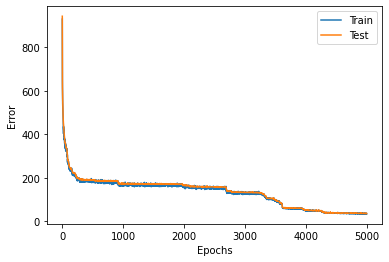

In [22]:
train_loss_list = torch.tensor(train_loss_list)
val_loss_list = torch.tensor(val_loss_list)

plt.plot(range(len(train_loss_list)), train_loss_list, label="Train")
plt.plot(range(len(val_loss_list)), val_loss_list, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

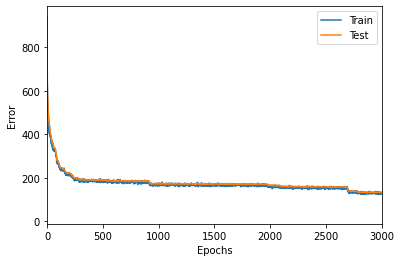

In [23]:
plt.xlim(0, 3000)
plt.plot(range(len(train_loss_list)), train_loss_list, label="Train")
plt.plot(range(len(val_loss_list)), val_loss_list, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [24]:
valid_net = NET().to(device)
valid_net.eval()
valid_net.load_state_dict(torch.load('model' + str(best_epoch) +'.pth'))

<All keys matched successfully>

In [25]:
import seaborn
def test():
    test_net.eval()
    running_loss = 0
    with torch.no_grad():
        total_max_temp_error = 0
        total_min_temp_error = 0
        max_error_x = 0
        max_error_y = 0
        min_error_x = 0
        min_error_y = 0
        error_per_pix = 0
        loss_sum = 0
        max_error_x_abs = 0
        max_error_y_abs = 0
        min_error_x_abs = 0
        min_error_y_abs = 0
            
        estimate_list = []

        for batch_idx, (x, c) in enumerate(test_loader):
            estimate_start = time.time()
            print('=================================')
            x, c = tmp.next()
            x = x.to(device)
            c = c.to(device)
            y = model(x)
            estimate_end = time.time()
            estimate_duration = -estimate_start+estimate_end
            print("{}個目のモデルの推定時間は：{}秒です".format(batch_idx+1, estimate_duration))
            estimate_list.append(estimate_duration)
            continue
            loss = criterion(y, c)
            loss_unit = torch.sum(torch.abs(y-c))/16/18
            loss_sum = loss_sum + loss_unit
            running_loss += loss.item()
            
            
            y = y.cpu()
            c = c.cpu()
            c_reshaped = c.reshape(16, 18)
            seaborn.heatmap(c_reshaped, vmin=18, vmax=25)
            plt.show()
            y_reshaped = y.reshape(16, 18)
            seaborn.heatmap(y_reshaped, vmin=18, vmax=25)
            plt.show()
            
            #最高温度のずれ
            max_temp_output = torch.max(c)
            max_temp_target = torch.max(y)
            max_temp_error = max_temp_output - max_temp_target
            total_max_temp_error = total_max_temp_error + max_temp_error

            #最低温度のずれ
            min_temp_output = torch.min(c)
            min_temp_target = torch.min(y)
            min_temp_error = min_temp_output - min_temp_target
            total_min_temp_error = total_min_temp_error + min_temp_error

            #最高温度を示すピクセルの座標のずれ(絶対値)
            max_temp_arg = torch.argmax(c)
            max_x_output = (max_temp_arg + 1)%18 -1
            max_y_output = -(max_temp_arg + 1)//18

            max_temp_arg = torch.argmax(y)
            max_x_target = (max_temp_arg + 1)%18 -1
            max_y_target = -(max_temp_arg + 1)//18
            
            max_error_x = max_error_x + abs(max_x_output - max_x_target)
            max_error_y = max_error_y + abs(max_y_output - max_y_target)

            # 最低温度を示すピクセルの座標のずれ(絶対値)
            min_temp_arg = torch.argmin(c)
            min_x_output = (min_temp_arg + 1)%18 -1
            min_y_output = -(min_temp_arg + 1)//18

            min_temp_arg = torch.argmin(y)
            min_x_target = (min_temp_arg + 1)%18 -1
            min_y_target = -(min_temp_arg + 1)//18
            
            min_error_x = min_error_x + abs(min_x_output - min_x_target)
            min_error_y = min_error_y + abs(min_y_output - min_y_target)

    print("平均時間は{}秒です".format(sum(estimate_list)/len(estimate_list)))
    return 0

    print('1ピクセルあたりの誤差', loss_sum/len(test_loader))
    print('最高温度のずれ', total_max_temp_error/len(test_loader))      
    print('最低温度のずれ', total_min_temp_error/len(test_loader))
    print('最高温度を示すピクセルの座標のずれ', max_error_x_abs/len(test_loader), max_error_y_abs/len(test_loader), )
    print('最低温度を示すピクセルの座標のずれ', min_error_x_abs/len(test_loader), min_error_y_abs/len(test_loader), )
    
    print("batch_size: {}　です。頑張ってください".format(batchsize))
    print(fpath)
    p = [loss_sum/len(test_loader), total_max_temp_error/len(test_loader), total_min_temp_error/len(test_loader), max_error_x/len(test_loader), max_error_y/len(test_loader), min_error_x/len(test_loader), min_error_y/len(test_loader), max_error_x_abs/len(test_loader), max_error_y_abs/len(test_loader), min_error_x_abs/len(test_loader), min_error_y_abs/len(test_loader), best_epoch]
    p = [float(x) for x in p]
    p.insert(0, "条件"+str(histwindow))
    print(*p, sep=', ')

    val_loss = running_loss / len(test_loader)

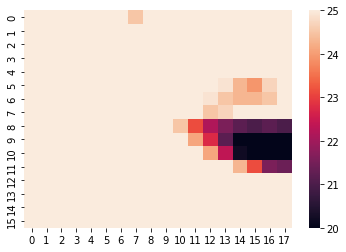

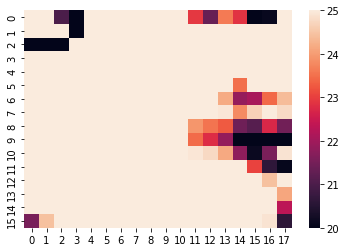

/tmp/ipykernel_557614/2405074226.py:60: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_output = (max_temp_arg + 1)//18
/tmp/ipykernel_557614/2405074226.py:64: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_target = (max_temp_arg + 1)//18
/tmp/ipykernel_557614/2405074226.py:75: UserWarning: __floordiv__ is deprecated, and its

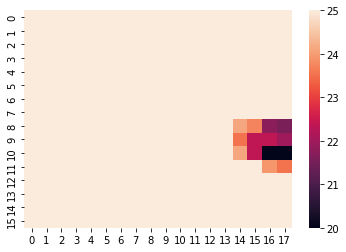

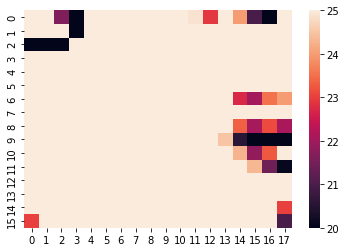

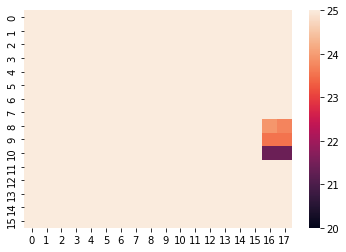

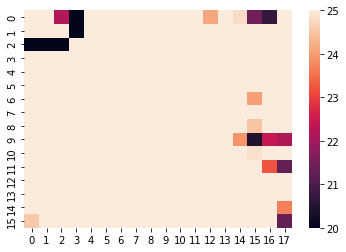

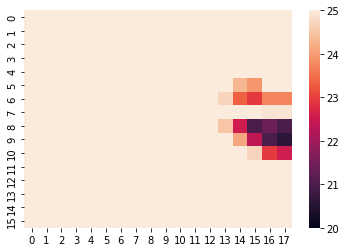

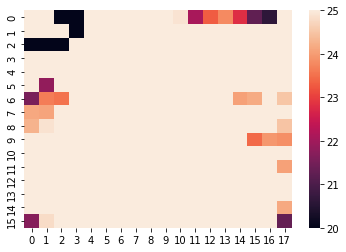

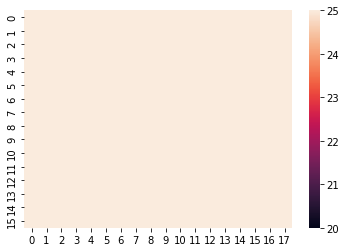

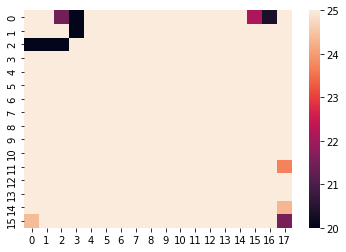

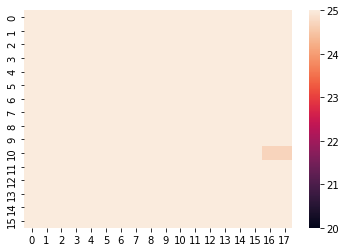

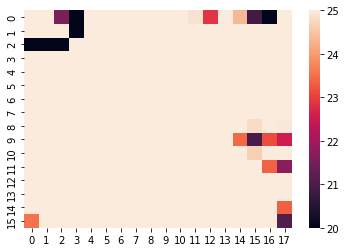

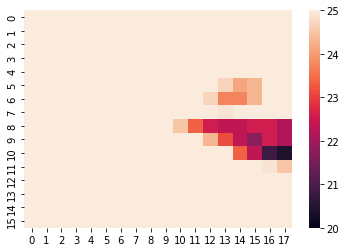

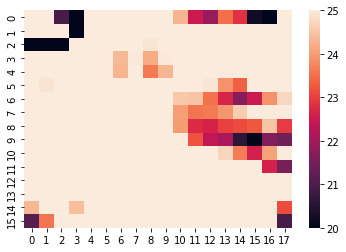

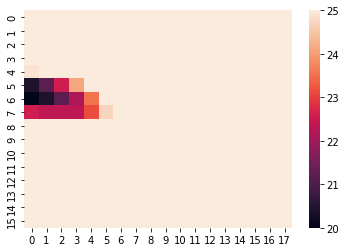

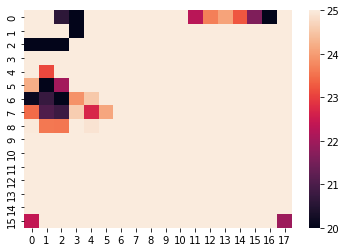

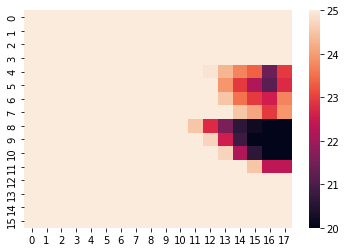

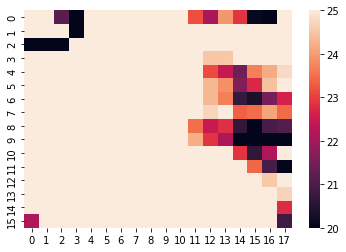

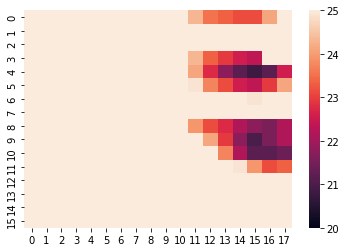

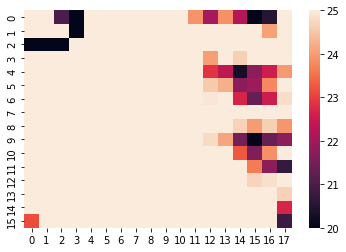

1ピクセルあたりの誤差 tensor(6.2835, device='cuda:0')
最高温度のずれ tensor(0.0691)
最低温度のずれ tensor(20.7843)
最高温度を示すピクセルの座標のずれ tensor(-1.8000) tensor(-3.8000)
最低温度を示すピクセルの座標のずれ tensor(9.1000) tensor(2.8000)
abs最高温度を示すピクセルの座標のずれ tensor(2.6000) tensor(4.2000)
abs最低温度を示すピクセルの座標のずれ tensor(9.1000) tensor(7.4000)


In [26]:
test()

#### test()

In [27]:
tmp = tmploader.__iter__()
xt, yt = tmp.next() 
model.eval()
with torch.no_grad():
    xtd = xt.to(device)
    ctd = model(xtd)
ctc = ctd.cpu()
ctc

tensor([[[[36.2719, 30.1685, 21.2303,  0.0000, 27.6179, 28.1438, 32.4490,
           31.3191, 31.6934, 27.2086, 25.2703, 23.6524, 22.0629, 23.8580,
           22.8255, 20.2500, 19.7879, 29.8508],
          [34.0619, 33.3738, 34.0568,  0.0000, 30.0028, 28.9847, 30.0547,
           29.5763, 30.3678, 29.8628, 30.3330, 30.1010, 28.9971, 31.5181,
           32.0079, 29.9235, 25.1622, 28.3579],
          [ 0.0000,  0.0000,  0.0000, 35.0646, 33.2425, 29.2937, 29.5950,
           27.8087, 26.9527, 27.6874, 27.9228, 29.9180, 28.8783, 31.6786,
           34.3288, 35.5318, 32.9468, 32.1614],
          [39.2150, 37.7619, 38.9398, 35.9443, 35.3500, 31.2086, 29.5037,
           28.6420, 25.6053, 27.0470, 27.1741, 28.9805, 27.3707, 28.2644,
           29.4568, 31.3254, 32.7267, 29.1386],
          [37.3267, 33.1881, 36.7959, 35.3670, 34.2440, 32.2544, 29.4255,
           29.6209, 25.7292, 26.6997, 26.8845, 27.6514, 26.1990, 25.7771,
           24.8424, 26.8426, 25.9005, 24.8793],
          [33.5959, 

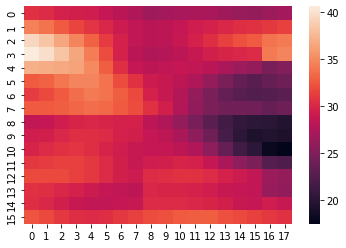

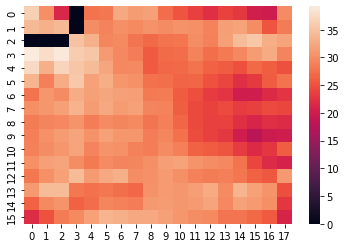

In [28]:
import seaborn
yt_reshaped = yt.reshape(16, 18)
seaborn.heatmap(yt_reshaped)
plt.show()
ctc_reshaped = ctc.reshape(16, 18)
seaborn.heatmap(ctc_reshaped)
plt.show()

In [29]:
#最高温度のずれ
max_temp_output = torch.max(ctc)
max_temp_target = torch.max(yt)
max_temp_error = max_temp_output - max_temp_target
print('max_temp_error', max_temp_error)

#最低温度のずれ
min_temp_output = torch.min(ctc)
min_temp_target = torch.min(yt)
min_temp_error = min_temp_output - min_temp_target
print('min_temp_error', min_temp_error)

#最高温度を示すピクセルの座標のずれ
max_temp_arg = torch.argmax(ctc)
max_x_output = (max_temp_arg + 1)//18
max_y_output = (max_temp_arg + 1)%18 -1

max_temp_arg = torch.argmax(yt)
max_x_target = (max_temp_arg + 1)//18
max_y_target = (max_temp_arg + 1)%18 -1

print('max_error_x', max_x_output - max_x_target)
print('max_error_y', max_y_output - max_y_target)

# 最低温度を示すピクセルの座標のずれ
min_temp_arg = torch.argmin(ctc)
min_x_output = (min_temp_arg + 1)//18
min_y_output = (min_temp_arg + 1)%18 -1

min_temp_arg = torch.argmin(yt)
min_x_target = (min_temp_arg + 1)//18
min_y_target = (min_temp_arg + 1)%18 -1

print('min_error_x', min_x_output - min_x_target)
print('min_error_y', min_y_output - min_y_target)

#入力データのXML変換

max_temp_error tensor(-1.3732)
min_temp_error tensor(-17.4510)
max_error_x tensor(0)
max_error_y tensor(0)
min_error_x tensor(-11)
min_error_y tensor(4)


/tmp/ipykernel_557614/1319774106.py:15: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_output = (max_temp_arg + 1)//18
/tmp/ipykernel_557614/1319774106.py:19: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_x_target = (max_temp_arg + 1)//18
/tmp/ipykernel_557614/1319774106.py:27: UserWarning: __floordiv__ is deprecated, and its

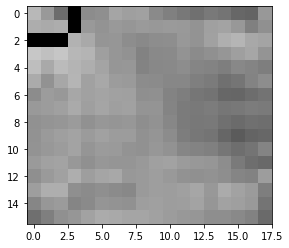

In [30]:
heatmapshow(ctc)